# Telecom Churn Case Study

## Problem Statement 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, Telecom companies need to predict which customers are at high risk of churn.

## Step 1: Importing and Cleaning Data

In [246]:
## Importing useful Libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import sklearn
from sklearn.preprocessing import StandardScaler

In [247]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [248]:
# read the dataset
#tel_data = pd.read_csv("C:/Users/Asus/Documents/Data Science Course Material/Course-3(ML-2)/Telecom Case Study/telecom_churn_data.csv")
tel_data = pd.read_csv("telecom_churn_data.csv")
tel_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Perform Basic checks on the data

In [249]:
# Investigate total no. of rows and columns
tel_data.shape

(99999, 226)

In [250]:
# Check Columns
tel_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [251]:
# basics of the df
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [252]:
tel_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Rename columns with the meaningful names

In [253]:
# Check columns other than _6,_7,_8 and _9
cols_to_rename = [col for col in tel_data.columns if '_6' not in col and '_7' not in col
                 and '_8' not in col and '_9' not in col]
print(cols_to_rename)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']


In [254]:
# Rename with meaningful names
tel_data.rename(columns={'aug_vbc_3g':'vbc_3g_8',
                          'jul_vbc_3g':'vbc_3g_7',
                          'sep_vbc_3g':'vbc_3g_9',
                          'jun_vbc_3g':'vbc_3g_6'}, 
                 inplace=True)

## Handling Missing Values

In [255]:
## Check columns with high percentage

null_count = round(tel_data.isnull().sum() / len(tel_data),2)
missing_values = null_count[(null_count > 0.0)].index

In [256]:
# Print the names of missing columns
missing_values

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'],
      dtype='object', length=166)

### First we impute all recharge columns with 0 as NULL indicates that person has not done any recharge
### Fetching Recharge Columns

In [257]:
rech_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [258]:
# impute missing values with 0
tel_data[rech_impute] = tel_data[rech_impute].apply(lambda x: x.fillna(0))

#### Inspecting Categorical Variables

In [259]:
#Checking categorical type columns
tel_data.select_dtypes(include='object').columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

Since all categorical variables are date and Id Columns,. It will not help in our analysis. Therefore, dropping these columns

### Dropping Date and ID Columns

In [260]:
tel_data.drop(tel_data.select_dtypes(include='object').columns,axis = 1,inplace = True)

In [261]:
# Dropping below columns as well as it will not help in our analysis
tel_data.drop(['mobile_number', 'circle_id'], axis = 1,inplace=True)

In [262]:
# Again Check the shape of dataset
tel_data.shape

(99999, 212)

In [263]:
# Again Check the missing values
round(tel_data.isnull().sum() / len(tel_data),2)

loc_og_t2o_mou        0.01
std_og_t2o_mou        0.01
loc_ic_t2o_mou        0.01
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           0.04
onnet_mou_7           0.04
onnet_mou_8           0.05
onnet_mou_9           0.08
offnet_mou_6          0.04
offnet_mou_7          0.04
offnet_mou_8          0.05
offnet_mou_9          0.08
roam_ic_mou_6         0.04
roam_ic_mou_7         0.04
roam_ic_mou_8         0.05
roam_ic_mou_9         0.08
roam_og_mou_6         0.04
roam_og_mou_7         0.04
roam_og_mou_8         0.05
roam_og_mou_9         0.08
loc_og_t2t_mou_6      0.04
loc_og_t2t_mou_7      0.04
loc_og_t2t_mou_8      0.05
loc_og_t2t_mou_9      0.08
loc_og_t2m_mou_6      0.04
loc_og_t2m_mou_7      0.04
loc_og_t2m_mou_8      0.05
loc_og_t2m_mou_9      0.08
loc_og_t2f_mou_6      0.04
loc_og_t2f_mou_7      0.04
loc_og_t2f_mou_8      0.05
loc_og_t2f_mou_9      0.08
loc_og_t2c_mou_6      0.04
loc_og_t2c_mou_7      0.04
l

### Inspecting categorical columns which still have more than 70% missing data

In [264]:
Cat_obj = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
        'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

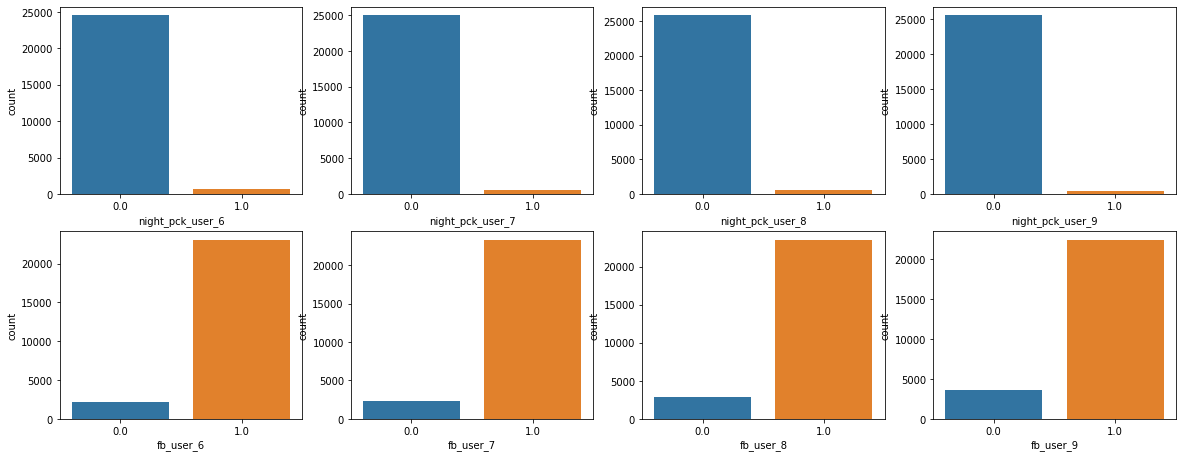

In [265]:
plt.figure(figsize=(20,20))
j=1
for i in range (0,len(Cat_obj)):
    plt.subplot(5, 4,j)
    sns.countplot(tel_data[Cat_obj[i]])
    j=j+1

Replace missing values in the categorical values with '-1' where '-1' will be a new category

In [266]:
# replace missing values with '-1' in categorical columns
tel_data[Cat_obj] = tel_data[Cat_obj].apply(lambda x: x.fillna(-1))

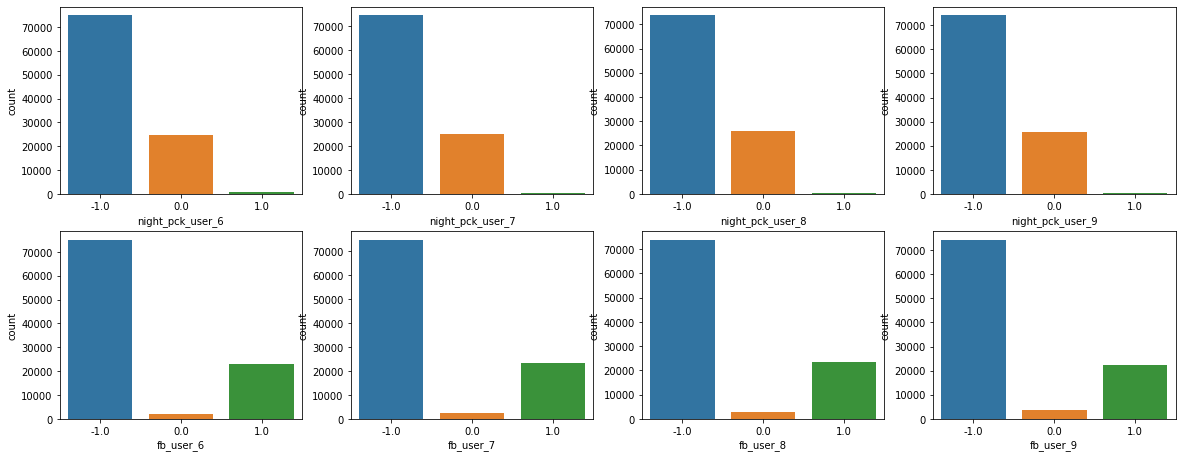

In [267]:
# Again check the data spread in categorical variables
plt.figure(figsize=(20,20))
j=1
for i in range (0,len(Cat_obj)):
    plt.subplot(5, 4,j)
    sns.countplot(tel_data[Cat_obj[i]])
    j=j+1

### Check Again the Missing Values accross all remaining Variables

In [268]:
# Check missing values more than 70%
null_count = round(tel_data.isnull().sum() / len(tel_data),2)
missing_values = null_count[(null_count > 0.70)].index

In [269]:
missing_values

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

### Drop all Attributes with High Missing Values

In [270]:
tel_data.drop(missing_values, axis=1, inplace=True)

In [271]:
tel_data.shape

(99999, 196)

### Data Imputation of remaining Missing values

In [272]:
# Again check remaining missing values
null_count = round(tel_data.isnull().sum() / len(tel_data),2)
any_missing_values = null_count[(null_count > 0.0)].index

In [273]:
any_missing_values

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=119)

In [274]:
#Check for NULL percentage greater than 40% for float variables
i = 0
percent_NA = 0
for i in tel_data.select_dtypes(include='float').columns:
    percent_NA = round(100*(tel_data[i].isnull().sum()/len(tel_data.index)),2)
    if percent_NA>0:
        print(i,' ',percent_NA)

loc_og_t2o_mou   1.02
std_og_t2o_mou   1.02
loc_ic_t2o_mou   1.02
onnet_mou_6   3.94
onnet_mou_7   3.86
onnet_mou_8   5.38
onnet_mou_9   7.75
offnet_mou_6   3.94
offnet_mou_7   3.86
offnet_mou_8   5.38
offnet_mou_9   7.75
roam_ic_mou_6   3.94
roam_ic_mou_7   3.86
roam_ic_mou_8   5.38
roam_ic_mou_9   7.75
roam_og_mou_6   3.94
roam_og_mou_7   3.86
roam_og_mou_8   5.38
roam_og_mou_9   7.75
loc_og_t2t_mou_6   3.94
loc_og_t2t_mou_7   3.86
loc_og_t2t_mou_8   5.38
loc_og_t2t_mou_9   7.75
loc_og_t2m_mou_6   3.94
loc_og_t2m_mou_7   3.86
loc_og_t2m_mou_8   5.38
loc_og_t2m_mou_9   7.75
loc_og_t2f_mou_6   3.94
loc_og_t2f_mou_7   3.86
loc_og_t2f_mou_8   5.38
loc_og_t2f_mou_9   7.75
loc_og_t2c_mou_6   3.94
loc_og_t2c_mou_7   3.86
loc_og_t2c_mou_8   5.38
loc_og_t2c_mou_9   7.75
loc_og_mou_6   3.94
loc_og_mou_7   3.86
loc_og_mou_8   5.38
loc_og_mou_9   7.75
std_og_t2t_mou_6   3.94
std_og_t2t_mou_7   3.86
std_og_t2t_mou_8   5.38
std_og_t2t_mou_9   7.75
std_og_t2m_mou_6   3.94
std_og_t2m_mou_7   3.86
st

In [275]:
#Check for NULL percentage greater than 40% for int variables
i = 0
percent_NA = 0
for i in tel_data.select_dtypes(include='int64').columns:
    percent_NA = round(100*(tel_data[i].isnull().sum()/len(tel_data.index)),2)
    if percent_NA>0:
        print(i,' ',percent_NA)

In [276]:
#Check for NULL percentage greater than 40% for categorical variables
i = 0
percent_NA = 0
for i in tel_data.select_dtypes(include='object').columns:
    percent_NA = round(100*(tel_data[i].isnull().sum()/len(tel_data.index)),2)
    if percent_NA>0:
        print(i,' ',percent_NA)

We do not have any missing values in categorical an int type variables

### Checking the spread of data in all months columns

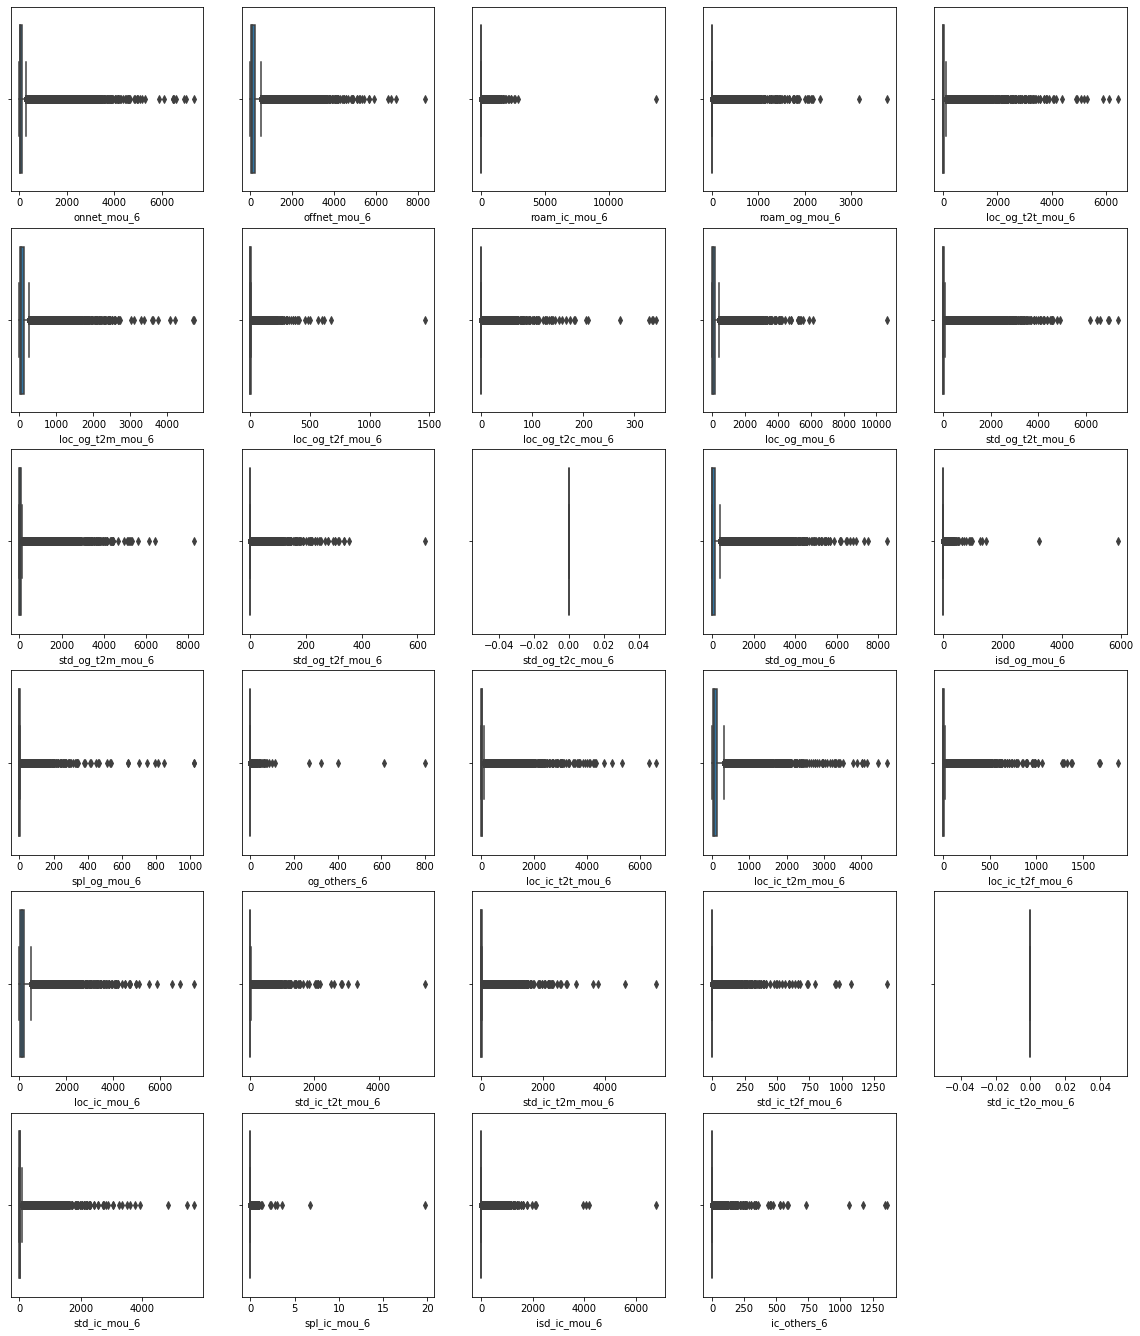

In [277]:
# Checking all columns for 6th month
plt.figure(figsize=(20,40))
i = 0
j=1
percent_NA = 0
for i in [col for col in tel_data.columns if '_6' in col]:
    percent_NA = round(100*(tel_data[i].isnull().sum()/len(tel_data.index)),2)
    if percent_NA>0:
        #print(i,' ',percent_NA)
        plt.subplot(10, 5,j)
        #plt.title(i)
        sns.boxplot(tel_data[i])
        j=j+1

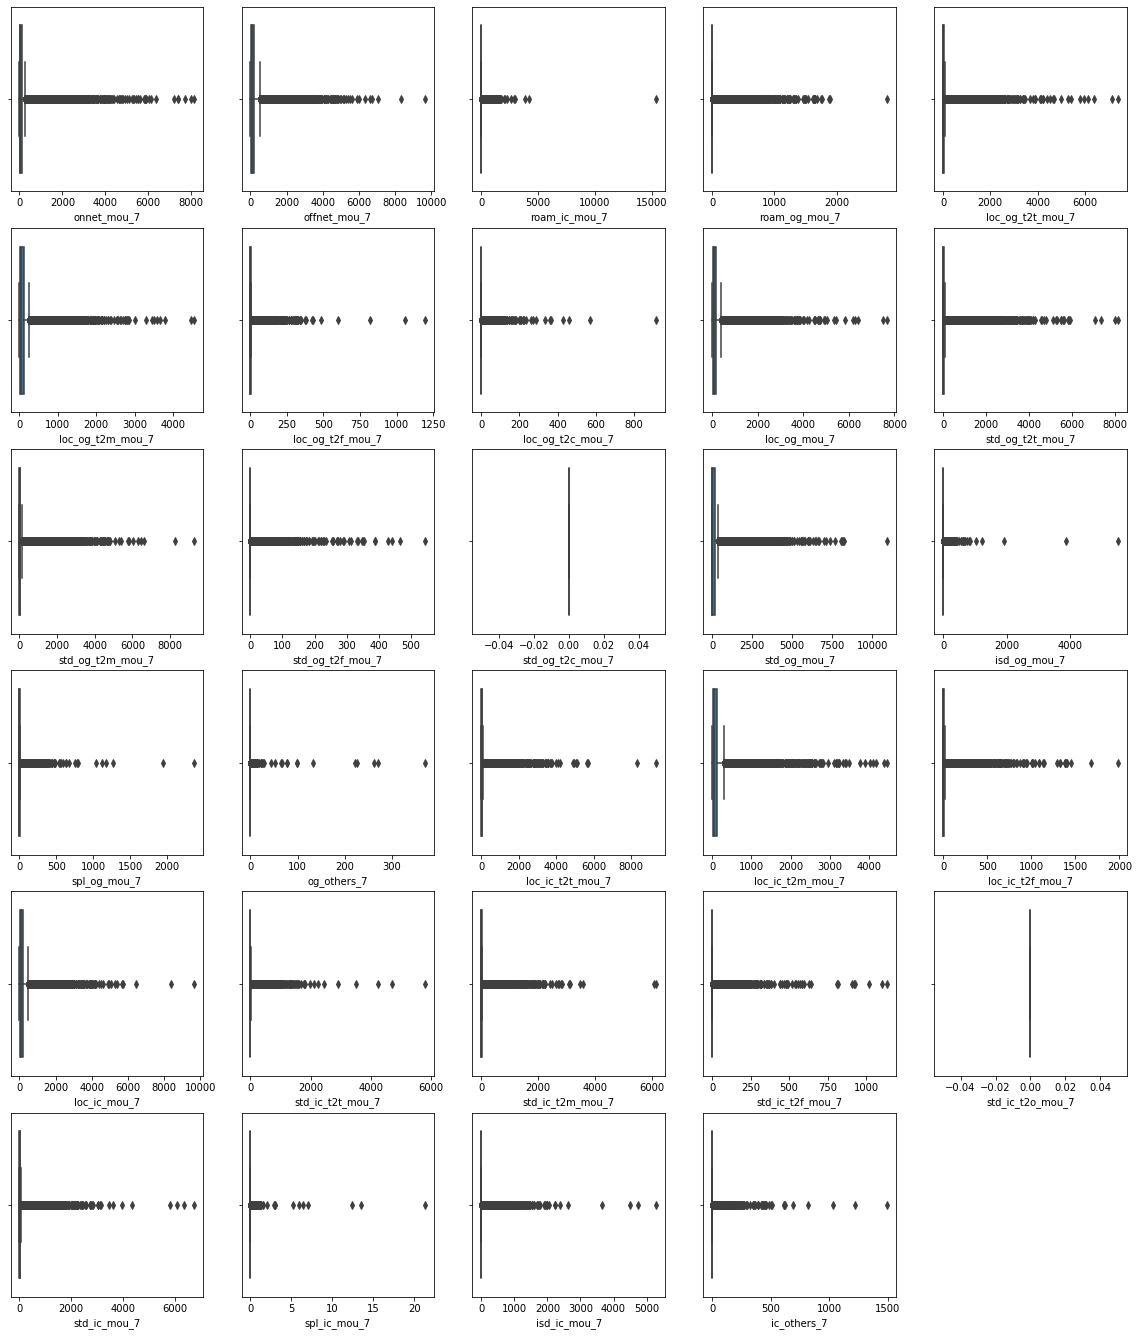

In [278]:
# Checking all columns for 7th month
plt.figure(figsize=(20,40))
i = 0
j=1
percent_NA = 0
for i in [col for col in tel_data.columns if '_7' in col]:
    percent_NA = round(100*(tel_data[i].isnull().sum()/len(tel_data.index)),2)
    if percent_NA>0:
        #print(i,' ',percent_NA)
        plt.subplot(10, 5,j)
        #plt.title(i)
        sns.boxplot(tel_data[i])
        j=j+1

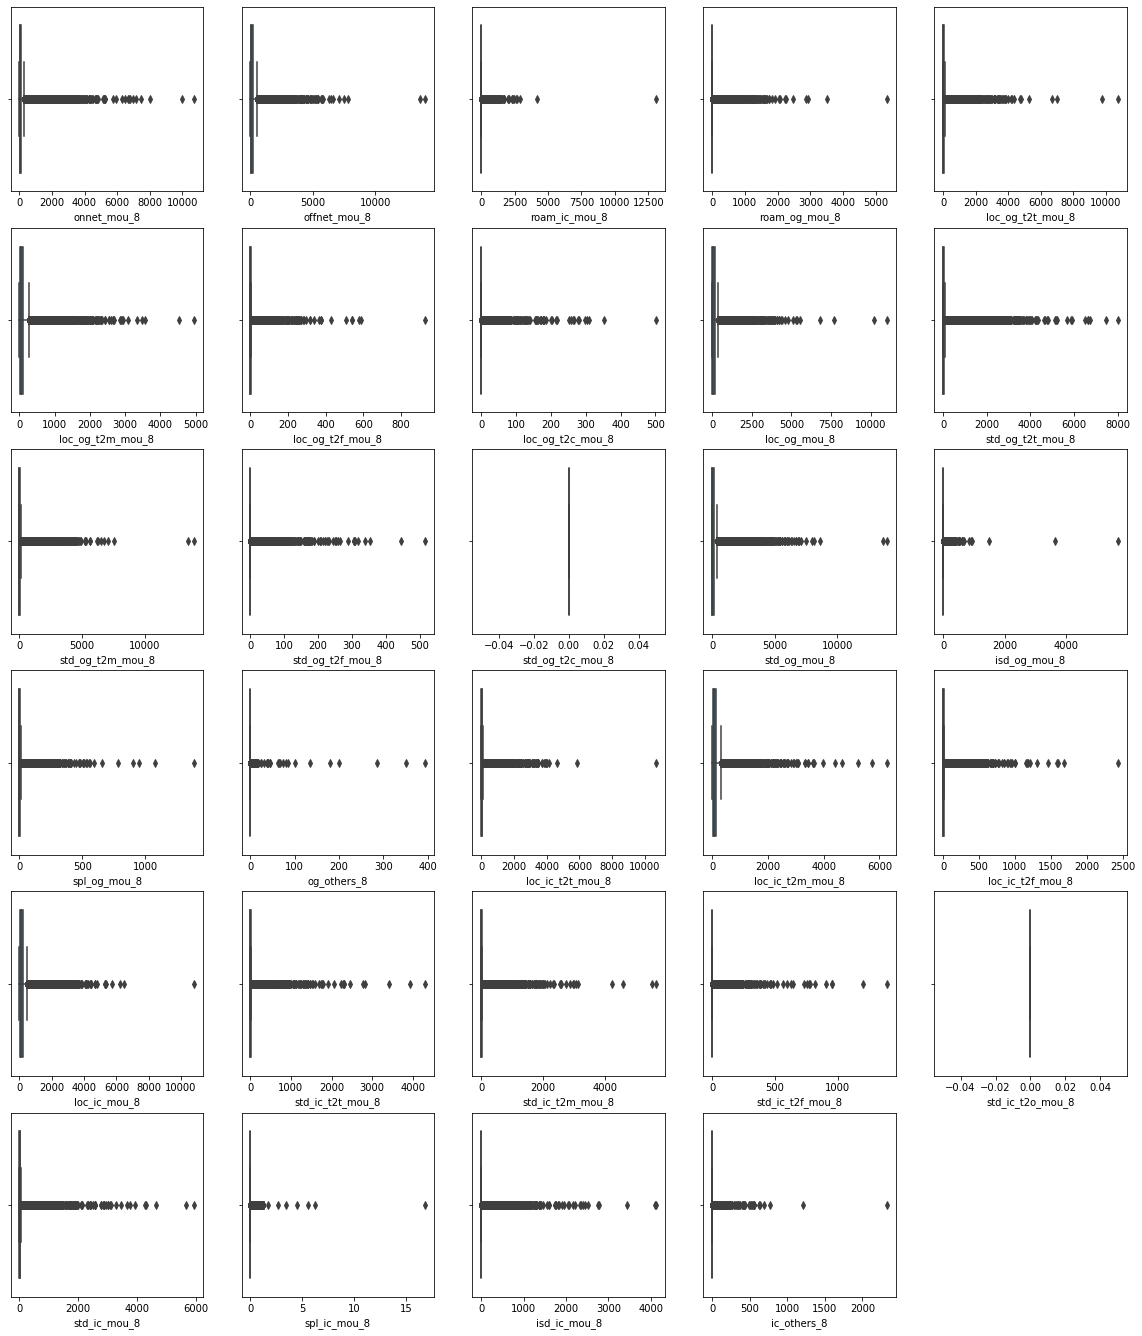

In [279]:
# Checking all columns for 8th month
plt.figure(figsize=(20,40))
i = 0
j=1
percent_NA = 0
for i in [col for col in tel_data.columns if '_8' in col]:
    percent_NA = round(100*(tel_data[i].isnull().sum()/len(tel_data.index)),2)
    if percent_NA>0:
        #print(i,' ',percent_NA)
        plt.subplot(10, 5,j)
        #plt.title(i)
        sns.boxplot(tel_data[i])
        j=j+1

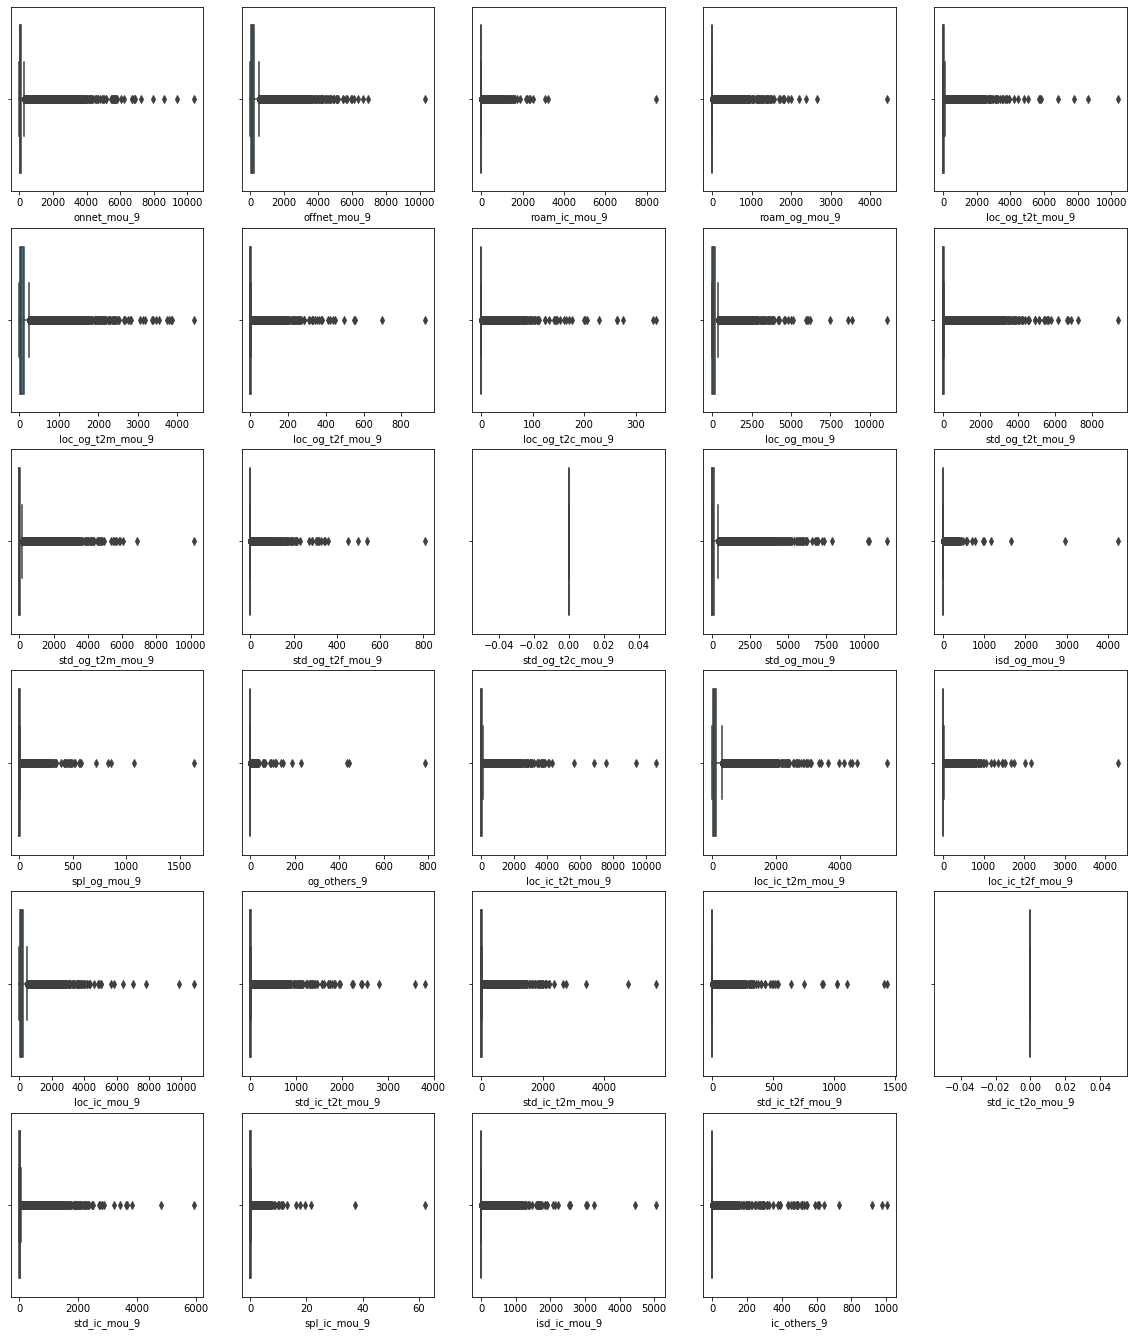

In [280]:
# Checking all columns for 9th month
plt.figure(figsize=(20,40))
i = 0
j=1
percent_NA = 0
for i in [col for col in tel_data.columns if '_9' in col]:
    percent_NA = round(100*(tel_data[i].isnull().sum()/len(tel_data.index)),2)
    if percent_NA>0:
        #print(i,' ',percent_NA)
        plt.subplot(10, 5,j)
        #plt.title(i)
        sns.boxplot(tel_data[i])
        j=j+1

#### From above boxplots we see that there are number of attributes having only 1 Value. Lets remove those

In [281]:
tel_data['std_ic_t2o_mou_9'].value_counts()

0.0    92254
Name: std_ic_t2o_mou_9, dtype: int64

In [282]:
tel_data['std_og_t2c_mou_9'].value_counts()

0.0    92254
Name: std_og_t2c_mou_9, dtype: int64

In [283]:
#Remove Columns with only 1 unique value
tel_data = tel_data.loc[:,tel_data.apply(pd.Series.nunique) != 1]
tel_data.shape

(99999, 185)

#### As we have seen from Boxplot, none of the attribute for which value is missing is normally distributes and hence replace all the missing values with medians

In [284]:
#Again check for NULL percentage greater than 0%
i = 0
percent_NA = 0
for i in tel_data.columns:
    percent_NA = round(100*(tel_data[i].isnull().sum()/len(tel_data.index)),2)
    if percent_NA>0:
        tel_data.loc[pd.isnull(tel_data[i]),[i]]=tel_data[i].median()

In [285]:
# Again Check if there are any missing values
round(tel_data.isnull().sum() / len(tel_data),2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

In [286]:
null_count = round(tel_data.isnull().sum() / len(tel_data),2)
any_missing_values = null_count[(null_count > 0.0)].index

In [287]:
any_missing_values

Index([], dtype='object')

So, till here we have performed data cleaning and impute all the missing values

In [288]:
# Shape of dataset after imputation
tel_data.shape

(99999, 185)

## Step- 2 Fine High Value Customers

#### Calculate Total Data Recharge Amount

In [289]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
tel_data['total_data_rech_6'] = tel_data.total_rech_data_6 * tel_data.av_rech_amt_data_6
tel_data['total_data_rech_7'] = tel_data.total_rech_data_7 * tel_data.av_rech_amt_data_7

#### Add total data recharge and total recharge to get total combined recharge amount for a month

In [290]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
tel_data['amt_data_6'] = tel_data.total_rech_amt_6 + tel_data.total_data_rech_6
tel_data['amt_data_7'] = tel_data.total_rech_amt_7 + tel_data.total_data_rech_7

In [291]:
# calculate average recharge done by customer in June and July
tel_data['av_amt_data_6_7'] = (tel_data.amt_data_6 + tel_data.amt_data_7)/2

In [292]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(tel_data.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [293]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df_high_val_cust = tel_data.loc[tel_data.av_amt_data_6_7 >= tel_data.av_amt_data_6_7.quantile(0.7), :]
df_high_val_cust = df_high_val_cust.reset_index(drop=True)
df_high_val_cust.shape

(30001, 190)

In [294]:
# delete variables created to filter high-value customers
df_high_val_cust = df_high_val_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df_high_val_cust.shape

(30001, 185)

## Step-3 Derive Churn

In [295]:
# calculate total incoming and outgoing minutes of usage
df_high_val_cust['total_calls_mou_9'] = df_high_val_cust.total_ic_mou_9 + df_high_val_cust.total_og_mou_9

In [296]:
# calculate 2g and 3g data consumption
df_high_val_cust['total_internet_mb_9'] =  df_high_val_cust.vol_2g_mb_9 + df_high_val_cust.vol_3g_mb_9

In [297]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
df_high_val_cust['churn'] = df_high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [298]:
# delete derived variables
df_high_val_cust = df_high_val_cust.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [299]:
# change data type to category
df_high_val_cust.churn = df_high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(df_high_val_cust.churn.value_counts()*100/df_high_val_cust.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


## Step-4 Feature Engineering - Derive new features

#### Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [300]:
df_high_val_cust['arpu_diff'] = df_high_val_cust.arpu_8 - ((df_high_val_cust.arpu_6 + df_high_val_cust.arpu_7)/2)

df_high_val_cust['onnet_mou_diff'] = df_high_val_cust.onnet_mou_8 - ((df_high_val_cust.onnet_mou_6 + df_high_val_cust.onnet_mou_7)/2)

df_high_val_cust['offnet_mou_diff'] = df_high_val_cust.offnet_mou_8 - ((df_high_val_cust.offnet_mou_6 + df_high_val_cust.offnet_mou_7)/2)

df_high_val_cust['roam_ic_mou_diff'] = df_high_val_cust.roam_ic_mou_8 - ((df_high_val_cust.roam_ic_mou_6 + df_high_val_cust.roam_ic_mou_7)/2)

df_high_val_cust['roam_og_mou_diff'] = df_high_val_cust.roam_og_mou_8 - ((df_high_val_cust.roam_og_mou_6 + df_high_val_cust.roam_og_mou_7)/2)

df_high_val_cust['loc_og_mou_diff'] = df_high_val_cust.loc_og_mou_8 - ((df_high_val_cust.loc_og_mou_6 + df_high_val_cust.loc_og_mou_7)/2)

df_high_val_cust['std_og_mou_diff'] = df_high_val_cust.std_og_mou_8 - ((df_high_val_cust.std_og_mou_6 + df_high_val_cust.std_og_mou_7)/2)

df_high_val_cust['isd_og_mou_diff'] = df_high_val_cust.isd_og_mou_8 - ((df_high_val_cust.isd_og_mou_6 + df_high_val_cust.isd_og_mou_7)/2)

df_high_val_cust['spl_og_mou_diff'] = df_high_val_cust.spl_og_mou_8 - ((df_high_val_cust.spl_og_mou_6 + df_high_val_cust.spl_og_mou_7)/2)

df_high_val_cust['total_og_mou_diff'] = df_high_val_cust.total_og_mou_8 - ((df_high_val_cust.total_og_mou_6 + df_high_val_cust.total_og_mou_7)/2)

df_high_val_cust['loc_ic_mou_diff'] = df_high_val_cust.loc_ic_mou_8 - ((df_high_val_cust.loc_ic_mou_6 + df_high_val_cust.loc_ic_mou_7)/2)

df_high_val_cust['std_ic_mou_diff'] = df_high_val_cust.std_ic_mou_8 - ((df_high_val_cust.std_ic_mou_6 + df_high_val_cust.std_ic_mou_7)/2)

df_high_val_cust['isd_ic_mou_diff'] = df_high_val_cust.isd_ic_mou_8 - ((df_high_val_cust.isd_ic_mou_6 + df_high_val_cust.isd_ic_mou_7)/2)

df_high_val_cust['spl_ic_mou_diff'] = df_high_val_cust.spl_ic_mou_8 - ((df_high_val_cust.spl_ic_mou_6 + df_high_val_cust.spl_ic_mou_7)/2)

df_high_val_cust['total_ic_mou_diff'] = df_high_val_cust.total_ic_mou_8 - ((df_high_val_cust.total_ic_mou_6 + df_high_val_cust.total_ic_mou_7)/2)

df_high_val_cust['total_rech_num_diff'] = df_high_val_cust.total_rech_num_8 - ((df_high_val_cust.total_rech_num_6 + df_high_val_cust.total_rech_num_7)/2)

df_high_val_cust['total_rech_amt_diff'] = df_high_val_cust.total_rech_amt_8 - ((df_high_val_cust.total_rech_amt_6 + df_high_val_cust.total_rech_amt_7)/2)

df_high_val_cust['max_rech_amt_diff'] = df_high_val_cust.max_rech_amt_8 - ((df_high_val_cust.max_rech_amt_6 + df_high_val_cust.max_rech_amt_7)/2)

df_high_val_cust['total_rech_data_diff'] = df_high_val_cust.total_rech_data_8 - ((df_high_val_cust.total_rech_data_6 + df_high_val_cust.total_rech_data_7)/2)

df_high_val_cust['max_rech_data_diff'] = df_high_val_cust.max_rech_data_8 - ((df_high_val_cust.max_rech_data_6 + df_high_val_cust.max_rech_data_7)/2)

df_high_val_cust['av_rech_amt_data_diff'] = df_high_val_cust.av_rech_amt_data_8 - ((df_high_val_cust.av_rech_amt_data_6 + df_high_val_cust.av_rech_amt_data_7)/2)

df_high_val_cust['vol_2g_mb_diff'] = df_high_val_cust.vol_2g_mb_8 - ((df_high_val_cust.vol_2g_mb_6 + df_high_val_cust.vol_2g_mb_7)/2)

df_high_val_cust['vol_3g_mb_diff'] = df_high_val_cust.vol_3g_mb_8 - ((df_high_val_cust.vol_3g_mb_6 + df_high_val_cust.vol_3g_mb_7)/2)

In [301]:
# let's look at summary of one of the difference variables
df_high_val_cust['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

## Step-5 Drop all _9 month columns

In [302]:
# Now we will delete 9th month columns because we would predict churn/non-churn later based on data from the 1st 3 months
cols_to_drop = [col for col in df_high_val_cust.columns if '_9' in col]
print(cols_to_drop)

df_high_val_cust.drop(cols_to_drop, axis=1, inplace=True)

df_high_val_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']


(30001, 163)

## Step-6 Visualise Data - EDA

### Univariate Analysis

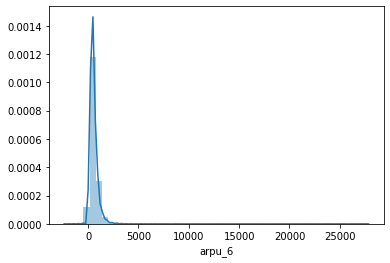

In [303]:
sns.distplot(df_high_val_cust.arpu_6)

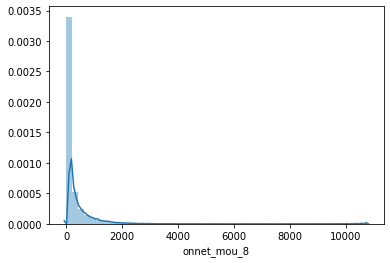

In [304]:
sns.distplot(df_high_val_cust.onnet_mou_8)

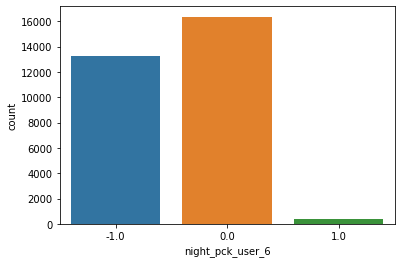

In [305]:
sns.countplot(df_high_val_cust.night_pck_user_6)

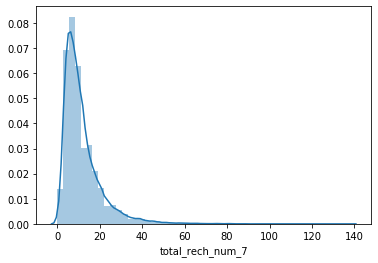

In [306]:
sns.distplot(df_high_val_cust.total_rech_num_7)

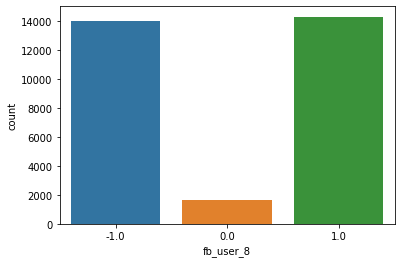

In [307]:
sns.countplot(df_high_val_cust.fb_user_8)

### Bivariate and Multivariate Analysis

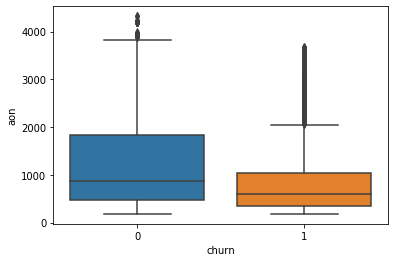

In [308]:
sns.boxplot(df_high_val_cust.churn, df_high_val_cust.aon)

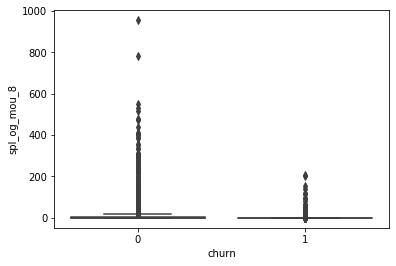

In [309]:
sns.boxplot(df_high_val_cust.churn, df_high_val_cust.spl_og_mou_8)

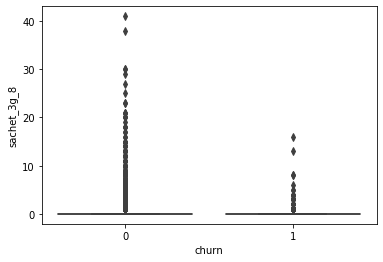

In [310]:
sns.boxplot(df_high_val_cust.churn, df_high_val_cust.sachet_3g_8)

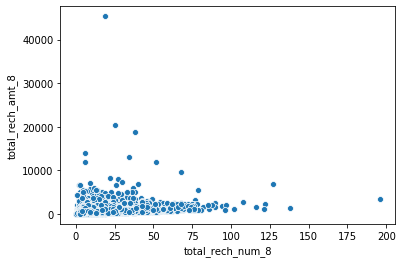

In [311]:
sns.scatterplot(df_high_val_cust.total_rech_num_8, df_high_val_cust.total_rech_amt_8)

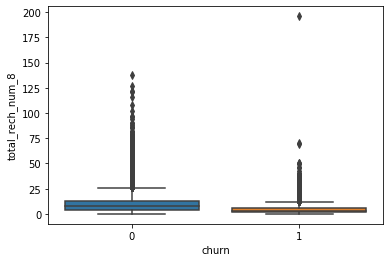

In [312]:
sns.boxplot(df_high_val_cust.churn, df_high_val_cust.total_rech_num_8)

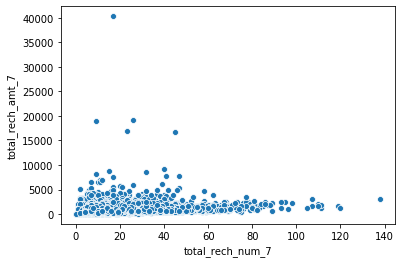

In [313]:
sns.scatterplot(df_high_val_cust.total_rech_num_7, df_high_val_cust.total_rech_amt_7)

As we can clearly see that we do have outliers in our dataset, we need to cap the outliers.

### Outliers Treatment - Cap Outliers

In [314]:
# Creating function for capping outliers in all numeric variables with k-sigma technique
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [315]:
# Inspecting both int and float type columns 
int_cols=df_high_val_cust.select_dtypes(include='int64').columns
float_cols=df_high_val_cust.select_dtypes(include='float').columns

In [316]:
int_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon'],
      dtype='object')

In [317]:
float_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=137)

In [318]:
# cap outliers in the numeric columns
df_high_val_cust[int_cols] = df_high_val_cust[int_cols].apply(cap_outliers, axis=0)
df_high_val_cust[float_cols] = df_high_val_cust[float_cols].apply(cap_outliers, axis=0)

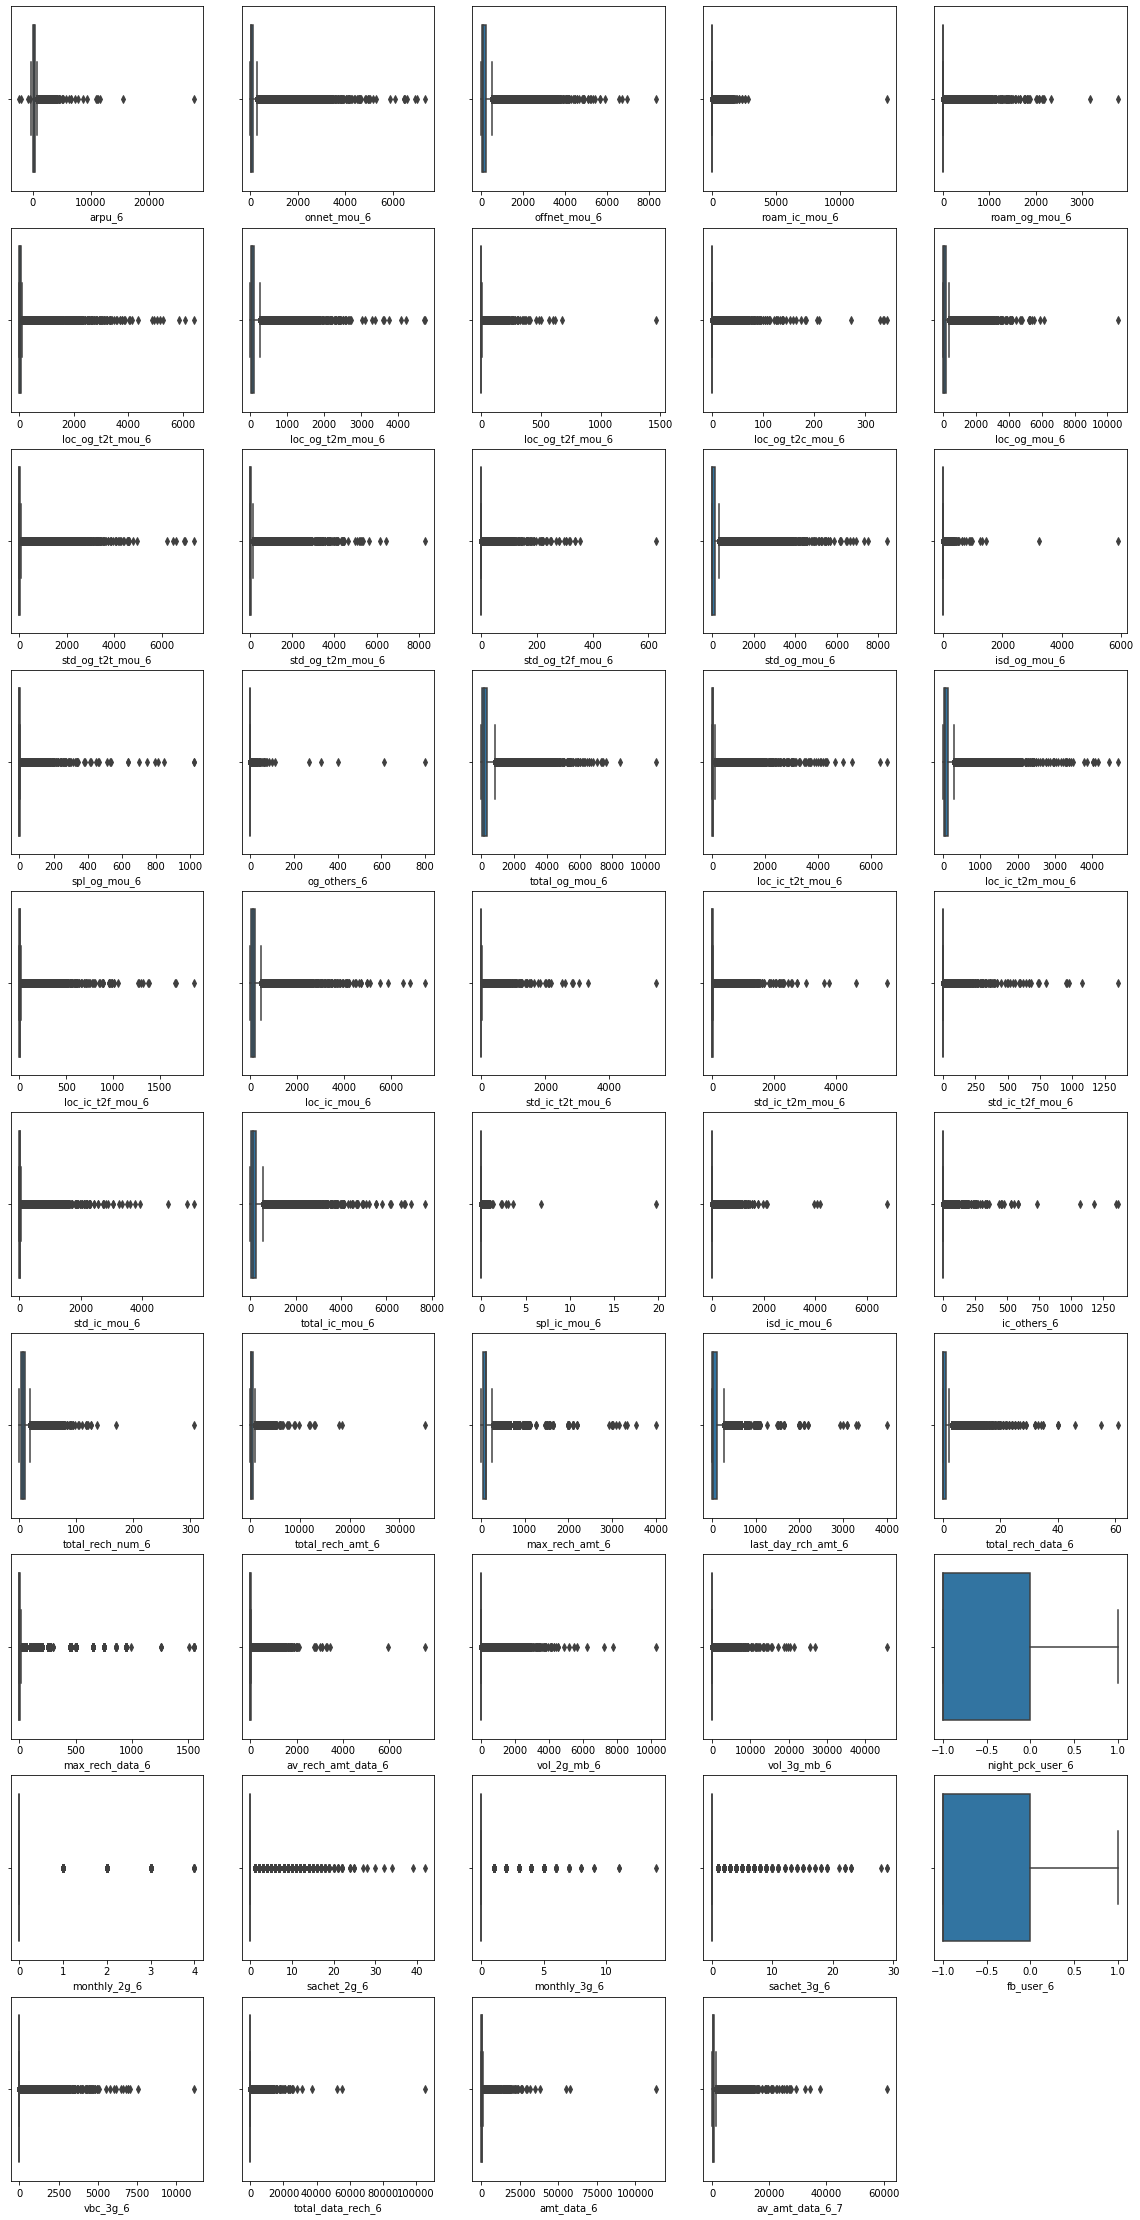

In [319]:
plt.figure(figsize=(20,40))
i = 0
j=1
percent_NA = 0
for i in [col for col in tel_data.columns if '_6' in col]:
    plt.subplot(10, 5,j)
    sns.boxplot(tel_data[i])
    j=j+1

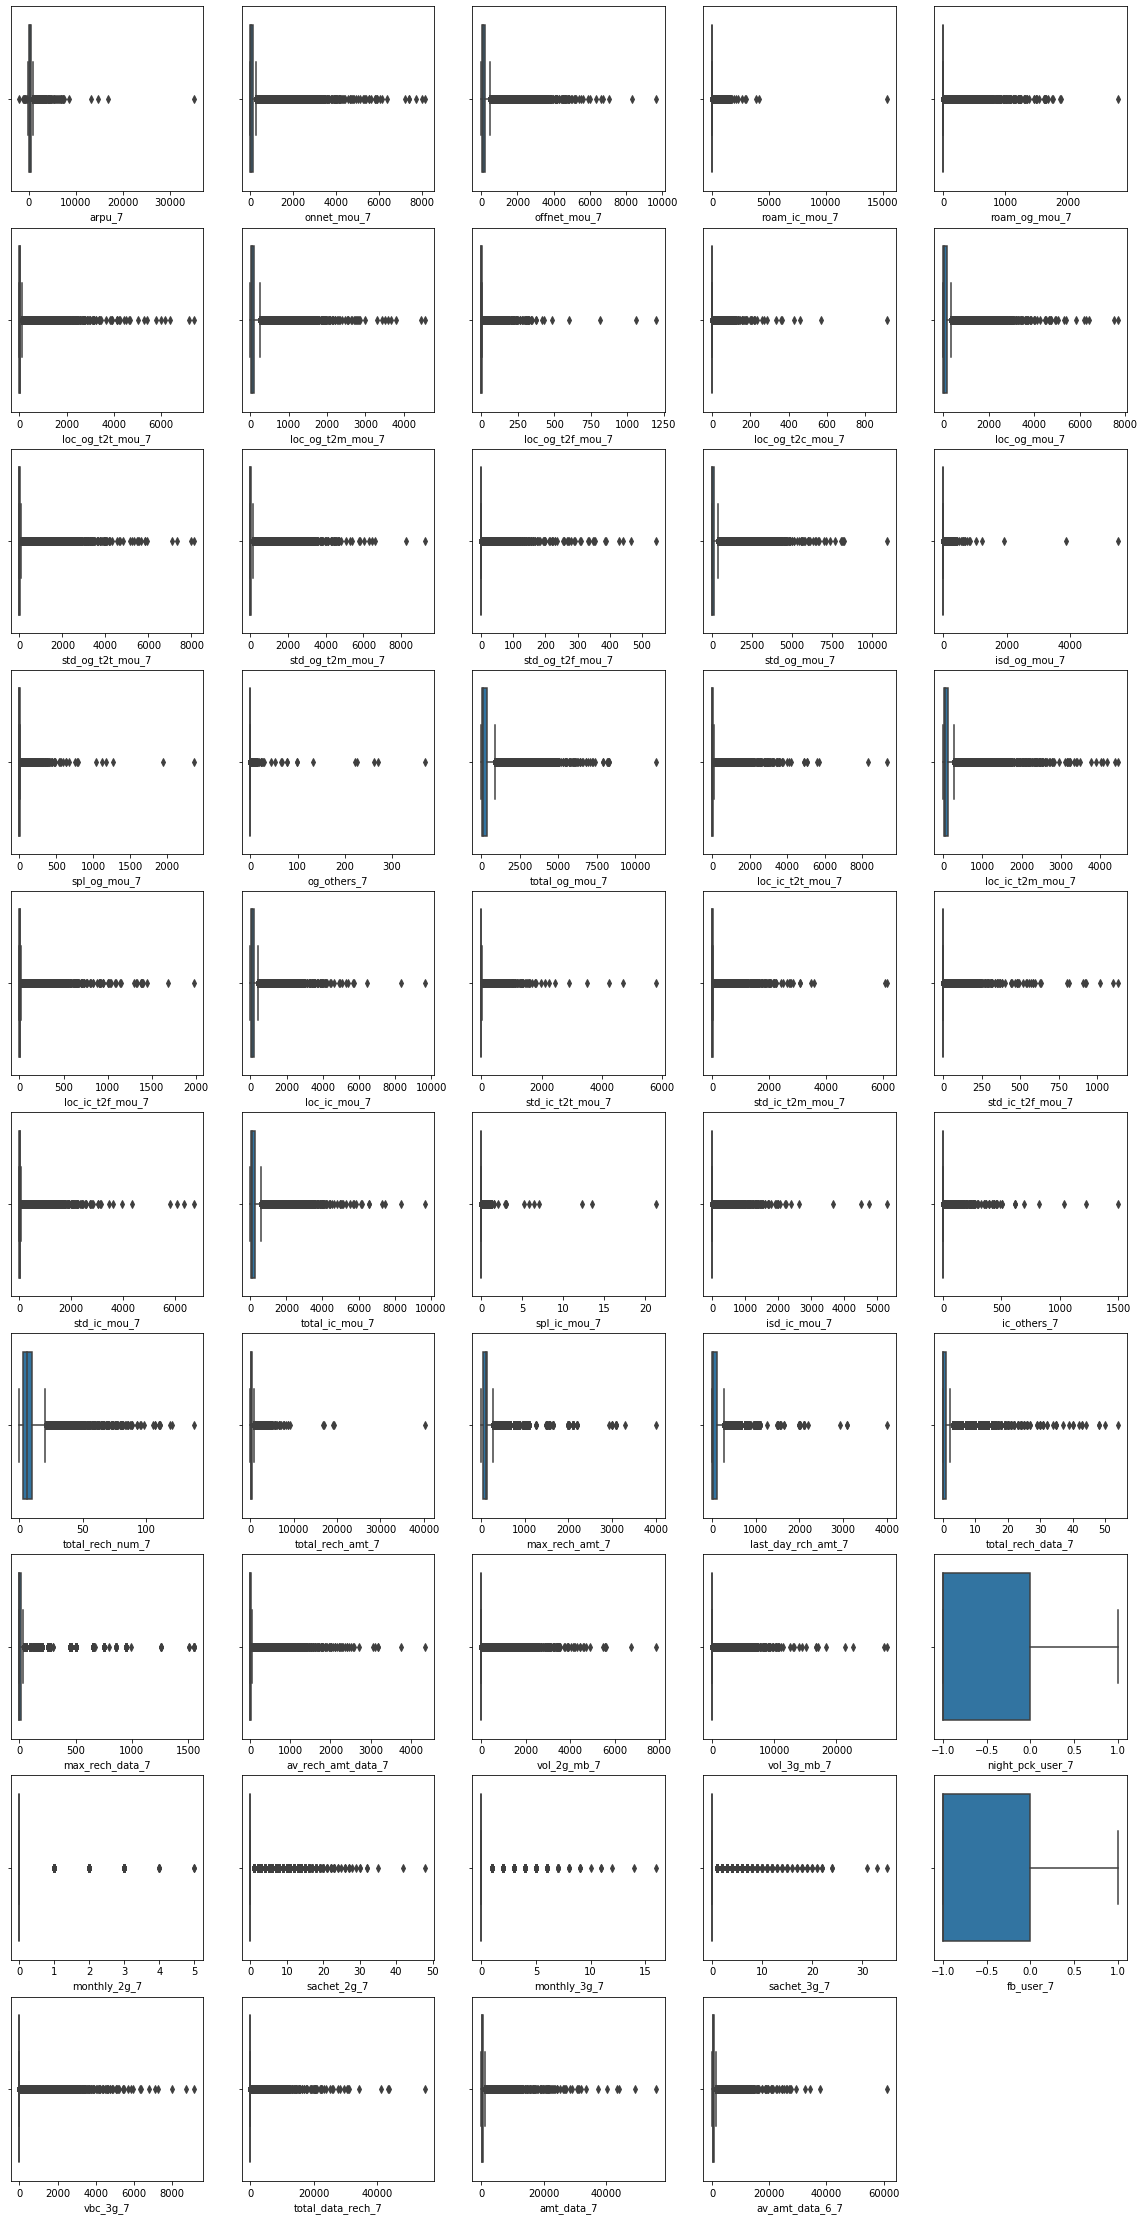

In [320]:
plt.figure(figsize=(20,40))
i = 0
j=1
percent_NA = 0
for i in [col for col in tel_data.columns if '_7' in col]:
    plt.subplot(10, 5,j)
    sns.boxplot(tel_data[i])
    j=j+1

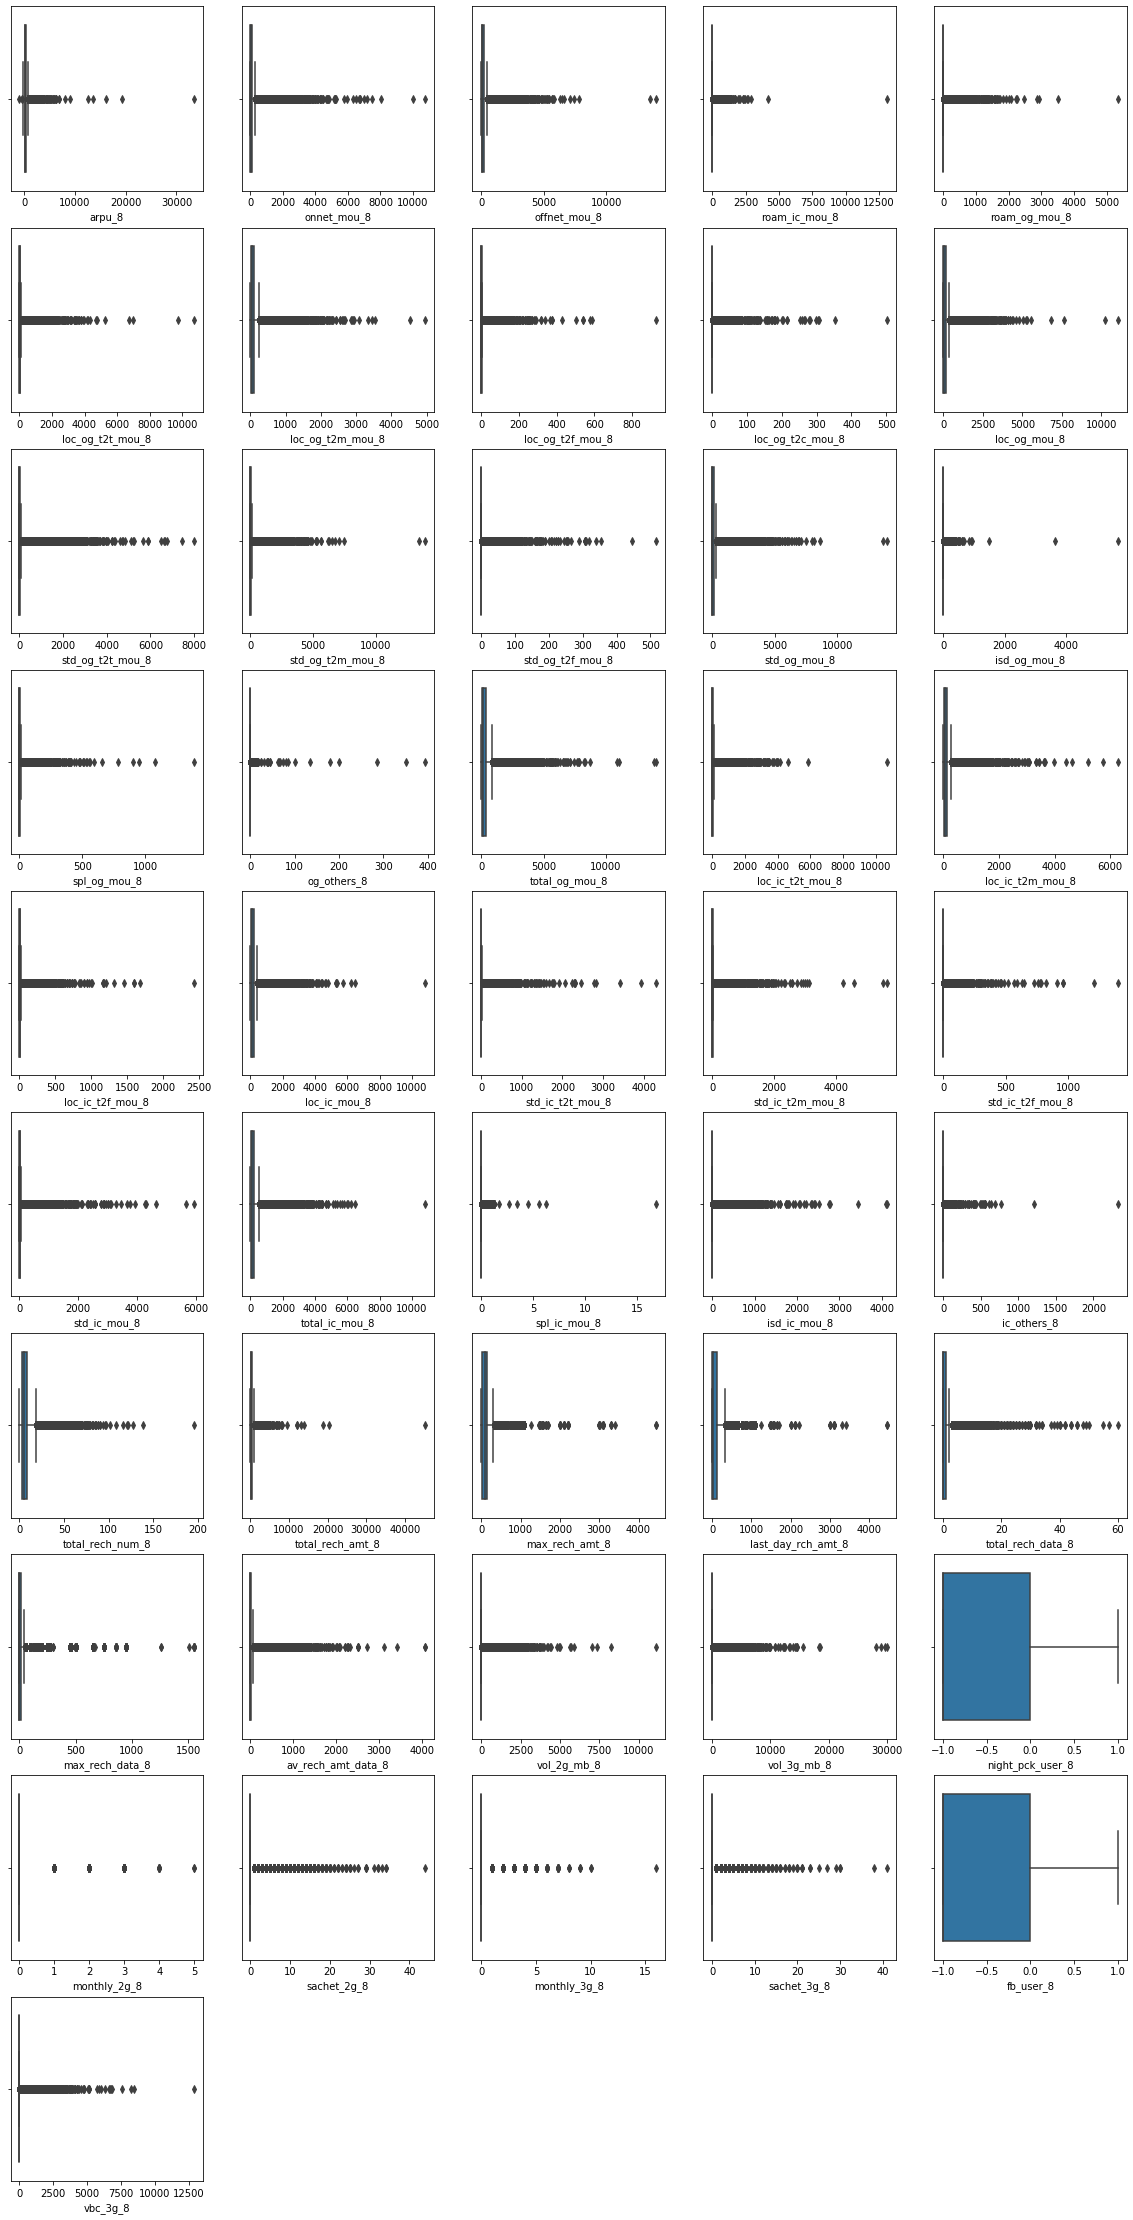

In [321]:
plt.figure(figsize=(20,40))
i = 0
j=1
percent_NA = 0
for i in [col for col in tel_data.columns if '_8' in col]:
    plt.subplot(10, 5,j)
    sns.boxplot(tel_data[i])
    j=j+1

### Check the Correlation

In [322]:
# Let's check the correlation among different features
corr= df_high_val_cust.loc[:, df_high_val_cust.dtypes!=np.object].corr()

In [323]:
corrdf=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns =  ['VAR1','VAR2','CORRELATION']
corrdf.dropna(subset=['CORRELATION'],inplace=True)
corr_top10_Positive=corrdf.sort_values('CORRELATION',ascending=False)
corr_top10_Negative=corrdf.sort_values('CORRELATION',ascending=True)
corr_top10_Positive[corr_top10_Positive['CORRELATION']>.9]

,VAR1,VAR2,CORRELATION
21501,fb_user_6,night_pck_user_6,0.956620
21664,fb_user_7,night_pck_user_7,0.956322
21827,fb_user_8,night_pck_user_8,0.954831
15392,total_rech_amt_8,arpu_8,0.944444
15066,total_rech_amt_6,arpu_6,0.932103
15229,total_rech_amt_7,arpu_7,0.927033
20191,sachet_2g_7,total_rech_data_7,0.908198
20354,sachet_2g_8,total_rech_data_8,0.907325
12699,total_ic_mou_6,loc_ic_mou_6,0.906471
13025,total_ic_mou_8,loc_ic_mou_8,0.904968


In [324]:
corr_top10_Negative=corr_top10_Negative[corr_top10_Negative['CORRELATION']<-.9]
corr_top10_Negative

,VAR1,VAR2,CORRELATION


We will not do anything here yet. We will proceed towards Modelling.

## Step-7 Modelling

In [325]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [326]:
# change churn to numeric
df_high_val_cust['churn'] = pd.to_numeric(df_high_val_cust['churn'])

### Test Train Split

In [327]:
# divide data into train and test
X = df_high_val_cust.drop("churn", axis = 1)
y = df_high_val_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y)

In [328]:
# Check the shape of X_train
X_train.shape

(21000, 162)

In [329]:
# print shapes of train and test sets
y_train.shape

(21000,)

In [330]:
# Check the shape of X_test
X_test.shape

(9001, 162)

In [331]:
y_test.shape

(9001,)

## Logistic Regression without PCA - (Good Interpretable Model)

In [201]:
# divide data into train and test
X_L = df_high_val_cust.drop("churn", axis = 1)
y_L = df_high_val_cust.churn
X_L_train, X_L_test, y_L_train, y_L_test = train_test_split(X_L, y_L, test_size = 0.3, random_state = 4, stratify = y)

In [202]:
float_var_L = X_L_train.select_dtypes(include='float').columns
int_var_L = X_L_train.select_dtypes(include='int64').columns

In [203]:
float_var_L

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=162)

In [204]:
int_var_L

Index([], dtype='object')

In [205]:
# Importe Data Scaling libraries and perform scaling on train data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_L_train[float_var_L] = scaler.fit_transform(X_L_train[float_var_L])
#X_train[int_var] = scaler.fit_transform(X_train[int_var])

X_L_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
28122,0.583275,2.317333,0.546706,-0.373263,-0.344415,-0.543887,0.096055,0.139269,0.110366,-0.294293,-0.254555,-0.167018,-0.306668,-0.282960,-0.205594,0.108478,-0.216155,-0.377999,1.057031,1.135593,0.962371,1.162607,0.141792,1.582172,-0.351359,-0.345438,-0.350563,0.766726,0.623478,0.501606,-0.417928,-0.257286,-0.437729,-0.481005,-0.446573,-0.432551,-0.241335,-0.234419,-0.235245,-0.572295,-0.456774,-0.545175,0.403275,1.146105,-0.108632,-0.484450,0.446584,-0.499343,-0.361143,-0.049565,-0.050792,-0.136416,-0.093557,-0.242570,1.496802,0.354326,-0.165894,2.253375,1.525204,1.082698,-0.073256,0.856632,2.070758,2.046043,1.231054,0.869358,0.460333,0.287006,-0.355813,-0.118921,-0.201307,-0.249307,-0.268037,0.019188,-0.155084,0.061774,-0.036316,-0.350611,1.766461,0.957338,0.584186,-0.430834,-0.218902,-0.279370,0.507221,-0.254977,-0.253198,-0.209972,-0.217144,-0.217802,-0.444093,-0.540444,-0.583432,0.611027,2.031026,0.715677,0.674315,2.877432,0.749200,1.494284,2.446247,1.553410,-0.673843,-0.680633,0.200919,-0.770865,-0.780576,0.839178,-0.767630,-0.782887,1.148875,-0.468210,-0.463971,-0.395892,-0.494477,-0.512132,-0.298765,-1.101780,-1.127700,0.877668,-0.424602,-0.431254,-0.398429,-0.470204,-0.485361,0.021503,-0.402097,-0.399227,-0.389789,-0.304476,-0.295336,1.534965,-1.106861,-1.128938,1.016881,1.135296,-0.289011,0.107766,-0.383971,-1.047512,-0.250839,-0.023924,0.143705,0.127330,-0.390403,-0.001215,-1.964564,-0.507137,-0.179928,-1.426877,-0.504561,-0.469147,0.112738,-1.347882,-0.127382,-0.675942,-1.400891,1.188579,2.320740,2.492976,0.151184,0.294930
22066,-1.029138,-1.053380,-0.6767

### Use SMOTE for Class Imbalance 

In [206]:
print("X_L_train Shape : ", X_L_train.shape)
y_L_train_imb = (y_L_train != 0).sum()/(y_L_train == 0).sum()
print("Imbalance in Train Data : ", y_L_train_imb)

X_L_train Shape :  (21000, 162)
Imbalance in Train Data :  0.08859053444611477


In [207]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_L_train,y_L_train = sm.fit_sample(X_L_train,y_L_train)

In [208]:
print("X_L_train Shape : ", X_L_train.shape)

y_L_train_imb = (y_L_train != 0).sum()/(y_L_train == 0).sum()
print("Imbalance in Train Data : ", y_L_train_imb)

X_L_train Shape :  (38582, 162)
Imbalance in Train Data :  1.0


## Feature Selection Using RFE

In [209]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [210]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_L_train, y_L_train)

In [211]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [212]:
# Checking the ranks assinged to each column by RFE
list(zip(X_L_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 104),
 ('arpu_7', False, 103),
 ('arpu_8', False, 12),
 ('onnet_mou_6', False, 86),
 ('onnet_mou_7', False, 101),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 17),
 ('offnet_mou_7', False, 20),
 ('offnet_mou_8', False, 106),
 ('roam_ic_mou_6', False, 69),
 ('roam_ic_mou_7', False, 121),
 ('roam_ic_mou_8', False, 70),
 ('roam_og_mou_6', False, 134),
 ('roam_og_mou_7', False, 110),
 ('roam_og_mou_8', False, 59),
 ('loc_og_t2t_mou_6', False, 2),
 ('loc_og_t2t_mou_7', False, 63),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 37),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 136),
 ('loc_og_t2f_mou_7', False, 36),
 ('loc_og_t2f_mou_8', False, 111),
 ('loc_og_t2c_mou_6', False, 122),
 ('loc_og_t2c_mou_7', False, 94),
 ('loc_og_t2c_mou_8', False, 116),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 114),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 105),
 ('std_og_t2t_mou_7', False, 66),

In [213]:
# Put all the columns selected by RFE in the variable 'col'
col = X_L_train.columns[rfe.support_]

In [214]:
# Checking Cols which are not taken by RFE
X_L_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'isd_ic_mou_diff', 'spl_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=142)

## Logistic Model Building

In [215]:
# Import statsmodels
import statsmodels.api as sm

In [216]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38561
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 31 Aug 2020   Deviance:                          nan
Time:                        14:32:47   Pearson chi2:                 1.02e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -35.1307   2.33e+04     -0.002      0.999   -4.57e+04    4.57e+04
onnet_mou_8           1.2583      0.104     12.098      0.000       1.054       1.462
loc_og_t2t_mou_8     -0.8355      0.106     -7.862      0.000      -1.044      -0.627
loc_og_t2m_mou_6      0.0395      0.052      0.759      0.448      -0.062       0.141
loc_og_t2m_mou_8     -0.7391      0.141     -5.229      0.000      -1.016      -0.462
loc_og_mou_6          0.0327      0.054      0.609      0.542      -0.073       0.138
loc_og_mou_8          1.0971      0.240      4.580      0.000       0.628       1.567
std_og_t2t_mou_8     -1.0755      0.095    -11.301      0.000      -1.262      -0.889
std_og_mou_8          1.3657      0.177      7.706      0.000       1.018       1.713
og_others_8        -657.1915   4.59e+05     -0.001      0.999      -9e+05    8.99e+05
total_og_mou_8       -1.9516      0.205     -9.527      0.000      -2.353      -1.550
loc_ic_t2t_mou_8     -0.9689      0.087    -11.168      0.000      -1.139      -0.799
loc_ic_t2m_mou_8     -1.5550      0.136    -11.449      0.000      -1.821      -1.289
loc_ic_t2f_mou_8     -0.6184      0.043    -14.516      0.000      -0.702      -0.535
loc_ic_mou_8          6.4974      0.227     28.628      0.000       6.053       6.942
std_ic_mou_8          1.3711      0.057     23.929      0.000       1.259       1.483
total_ic_mou_6       -0.7316      0.060    -12.236      0.000      -0.849      -0.614
total_ic_mou_8       -5.3973      0.188    -28.734      0.000      -5.766      -5.029
isd_ic_mou_8          0.6456      0.032     20.206      0.000       0.583       0.708
fb_user_8            -0.9071      0.016    -55.416      0.000      -0.939      -0.875
total_ic_mou_diff    -1.0867      0.046    -23.883      0.000      -1.176      -0.998
=====================================================================================
"""

In [217]:
# Drop column with high p-value
col = col.drop('og_others_8', 1)
col

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'isd_ic_mou_8', 'fb_user_8',
       'total_ic_mou_diff'],
      dtype='object')

In [218]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15401.
Date:                Mon, 31 Aug 2020   Deviance:                       30802.
Time:                        14:33:03   Pearson chi2:                 1.05e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7561      0.025    -69.159      0.000      -1.806      -1.706
onnet_mou_8           1.2547      0.104     12.101      0.000       1.052       1.458
loc_og_t2t_mou_8     -0.8418      0.106     -7.925      0.000      -1.050      -0.634
loc_og_t2m_mou_6      0.0374      0.052      0.718      0.473      -0.065       0.139
loc_og_t2m_mou_8     -0.7500      0.141     -5.307      0.000      -1.027      -0.473
loc_og_mou_6          0.0351      0.054      0.653      0.514      -0.070       0.140
loc_og_mou_8          1.1239      0.240      4.690      0.000       0.654       1.594
std_og_t2t_mou_8     -1.0721      0.095    -11.300      0.000      -1.258      -0.886
std_og_mou_8          1.3893      0.177      7.828      0.000       1.041       1.737
total_og_mou_8       -1.9796      0.205     -9.649      0.000      -2.382      -1.577
loc_ic_t2t_mou_8     -0.9702      0.087    -11.183      0.000      -1.140      -0.800
loc_ic_t2m_mou_8     -1.5552      0.136    -11.450      0.000      -1.821      -1.289
loc_ic_t2f_mou_8     -0.6213      0.043    -14.576      0.000      -0.705      -0.538
loc_ic_mou_8          6.4997      0.227     28.630      0.000       6.055       6.945
std_ic_mou_8          1.3661      0.057     23.848      0.000       1.254       1.478
total_ic_mou_6       -0.7290      0.060    -12.201      0.000      -0.846      -0.612
total_ic_mou_8       -5.3974      0.188    -28.722      0.000      -5.766      -5.029
isd_ic_mou_8          0.6453      0.032     20.198      0.000       0.583       0.708
fb_user_8            -0.9075      0.016    -55.473      0.000      -0.940      -0.875
total_ic_mou_diff    -1.0852      0.045    -23.867      0.000      -1.174      -0.996
=====================================================================================
"""

In [219]:
col = col.drop('loc_og_mou_6', 1)
col

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_8', 'isd_ic_mou_8', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [220]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15401.
Date:                Mon, 31 Aug 2020   Deviance:                       30802.
Time:                        14:33:28   Pearson chi2:                 1.06e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7557      0.025    -69.175      0.000      -1.805      -1.706
onnet_mou_8           1.2566      0.104     12.124      0.000       1.053       1.460
loc_og_t2t_mou_8     -0.8337      0.105     -7.909      0.000      -1.040      -0.627
loc_og_t2m_mou_6      0.0654      0.029      2.221      0.026       0.008       0.123
loc_og_t2m_mou_8     -0.7606      0.140     -5.421      0.000      -1.036      -0.486
loc_og_mou_8          1.1362      0.239      4.760      0.000       0.668       1.604
std_og_t2t_mou_8     -1.0737      0.095    -11.321      0.000      -1.260      -0.888
std_og_mou_8          1.3889      0.177      7.832      0.000       1.041       1.736
total_og_mou_8       -1.9798      0.205     -9.657      0.000      -2.382      -1.578
loc_ic_t2t_mou_8     -0.9696      0.087    -11.181      0.000      -1.140      -0.800
loc_ic_t2m_mou_8     -1.5561      0.136    -11.462      0.000      -1.822      -1.290
loc_ic_t2f_mou_8     -0.6210      0.043    -14.572      0.000      -0.705      -0.537
loc_ic_mou_8          6.4988      0.227     28.634      0.000       6.054       6.944
std_ic_mou_8          1.3654      0.057     23.840      0.000       1.253       1.478
total_ic_mou_6       -0.7263      0.060    -12.185      0.000      -0.843      -0.609
total_ic_mou_8       -5.3983      0.188    -28.730      0.000      -5.767      -5.030
isd_ic_mou_8          0.6450      0.032     20.192      0.000       0.582       0.708
fb_user_8            -0.9079      0.016    -55.526      0.000      -0.940      -0.876
total_ic_mou_diff    -1.0853      0.045    -23.872      0.000      -1.174      -0.996
=====================================================================================
"""

In [221]:
col = col.drop('loc_og_t2m_mou_6', 1)
col

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'isd_ic_mou_8', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [222]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38564
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15404.
Date:                Mon, 31 Aug 2020   Deviance:                       30807.
Time:                        14:34:20   Pearson chi2:                 1.09e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7533      0.025    -69.213      0.000      -1.803      -1.704
onnet_mou_8           1.2627      0.104     12.175      0.000       1.059       1.466
loc_og_t2t_mou_8     -0.8236      0.105     -7.835      0.000      -1.030      -0.618
loc_og_t2m_mou_8     -0.6928      0.137     -5.068      0.000      -0.961      -0.425
loc_og_mou_8          1.1125      0.238      4.667      0.000       0.645       1.580
std_og_t2t_mou_8     -1.0794      0.095    -11.373      0.000      -1.265      -0.893
std_og_mou_8          1.3846      0.177      7.819      0.000       1.038       1.732
total_og_mou_8       -1.9786      0.205     -9.665      0.000      -2.380      -1.577
loc_ic_t2t_mou_8     -0.9685      0.087    -11.165      0.000      -1.138      -0.798
loc_ic_t2m_mou_8     -1.5454      0.136    -11.383      0.000      -1.811      -1.279
loc_ic_t2f_mou_8     -0.6178      0.043    -14.515      0.000      -0.701      -0.534
loc_ic_mou_8          6.4774      0.227     28.553      0.000       6.033       6.922
std_ic_mou_8          1.3585      0.057     23.750      0.000       1.246       1.471
total_ic_mou_6       -0.6981      0.058    -11.991      0.000      -0.812      -0.584
total_ic_mou_8       -5.4053      0.188    -28.773      0.000      -5.774      -5.037
isd_ic_mou_8          0.6429      0.032     20.136      0.000       0.580       0.705
fb_user_8            -0.9108      0.016    -55.857      0.000      -0.943      -0.879
total_ic_mou_diff    -1.0876      0.045    -23.952      0.000      -1.177      -0.999
=====================================================================================
"""

In [223]:
# Getting the predicted values on the train set
y_L_train_pred = res.predict(X_L_train_sm)
y_L_train_pred[:10]

0    0.024345
1    0.112256
2    0.250966
3    0.818873
4    0.236367
5    0.036622
6    0.020811
7    0.306434
8    0.025376
9    0.144374
dtype: float64

In [224]:
y_L_train_pred = y_L_train_pred.values.reshape(-1)
y_L_train_pred[:10]

array([0.02434519, 0.11225628, 0.25096583, 0.81887269, 0.23636678,
       0.03662197, 0.02081105, 0.30643375, 0.02537624, 0.14437385])

In [225]:
y_L_train_pred_final = pd.DataFrame({'Churn':y_L_train.values, 'Churn_Prob':y_L_train_pred})
y_L_train_pred_final['CustID'] = y_L_train.index
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.024345,0
1,0,0.112256,1
2,0,0.250966,2
3,0,0.818873,3
4,0,0.236367,4


In [226]:
y_L_train_pred_final['predicted'] = y_L_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.024345,0,0
1,0,0.112256,1,0
2,0,0.250966,2,0
3,0,0.818873,3,1
4,0,0.236367,4,0


In [227]:
# Importing useful library for calculating metrics
from sklearn import metrics

In [228]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted )
print(confusion)

[[15895  3396]
 [ 3140 16151]]


In [229]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted))

0.8305945777823855


In [230]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_L_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_L_train[col].values, i) for i in range(X_L_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,74.72
6,total_og_mou_8,63.68
10,loc_ic_mou_8,62.02
5,std_og_mou_8,45.82
13,total_ic_mou_8,32.44
0,onnet_mou_8,31.70
2,loc_og_t2m_mou_8,28.07
4,std_og_t2t_mou_8,27.66
8,loc_ic_t2m_mou_8,24.36
1,loc_og_t2t_mou_8,14.63


In [232]:
# Drop column with high VIF Score
col = col.drop('loc_og_mou_8', 1)
col

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'isd_ic_mou_8', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [233]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38565
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15414.
Date:                Mon, 31 Aug 2020   Deviance:                       30828.
Time:                        14:34:58   Pearson chi2:                 2.07e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7538      0.025    -69.255      0.000      -1.803      -1.704
onnet_mou_8           1.3410      0.104     12.907      0.000       1.137       1.545
loc_og_t2t_mou_8     -0.4203      0.061     -6.859      0.000      -0.540      -0.300
loc_og_t2m_mou_8     -0.1179      0.062     -1.896      0.058      -0.240       0.004
std_og_t2t_mou_8     -1.1471      0.095    -12.043      0.000      -1.334      -0.960
std_og_mou_8          0.9224      0.141      6.540      0.000       0.646       1.199
total_og_mou_8       -1.4426      0.162     -8.921      0.000      -1.760      -1.126
loc_ic_t2t_mou_8     -1.0375      0.085    -12.179      0.000      -1.205      -0.871
loc_ic_t2m_mou_8     -1.6403      0.134    -12.263      0.000      -1.902      -1.378
loc_ic_t2f_mou_8     -0.6133      0.042    -14.432      0.000      -0.697      -0.530
loc_ic_mou_8          6.7946      0.216     31.492      0.000       6.372       7.217
std_ic_mou_8          1.4214      0.055     25.665      0.000       1.313       1.530
total_ic_mou_6       -0.6991      0.058    -11.993      0.000      -0.813      -0.585
total_ic_mou_8       -5.6348      0.180    -31.257      0.000      -5.988      -5.281
isd_ic_mou_8          0.6656      0.032     21.116      0.000       0.604       0.727
fb_user_8            -0.9122      0.016    -55.947      0.000      -0.944      -0.880
total_ic_mou_diff    -1.0867      0.045    -23.901      0.000      -1.176      -0.998
=====================================================================================
"""

In [234]:
col = col.drop('loc_og_t2m_mou_8', 1)
col

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_8', 'isd_ic_mou_8', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [235]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38566
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15416.
Date:                Mon, 31 Aug 2020   Deviance:                       30832.
Time:                        14:35:44   Pearson chi2:                 1.68e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7516      0.025    -69.256      0.000      -1.801      -1.702
onnet_mou_8           1.4134      0.098     14.370      0.000       1.221       1.606
loc_og_t2t_mou_8     -0.3885      0.060     -6.514      0.000      -0.505      -0.272
std_og_t2t_mou_8     -1.2116      0.090    -13.399      0.000      -1.389      -1.034
std_og_mou_8          1.1415      0.086     13.333      0.000       0.974       1.309
total_og_mou_8       -1.6990      0.095    -17.891      0.000      -1.885      -1.513
loc_ic_t2t_mou_8     -1.0517      0.085    -12.338      0.000      -1.219      -0.885
loc_ic_t2m_mou_8     -1.6774      0.133    -12.625      0.000      -1.938      -1.417
loc_ic_t2f_mou_8     -0.6144      0.043    -14.436      0.000      -0.698      -0.531
loc_ic_mou_8          6.7634      0.216     31.262      0.000       6.339       7.187
std_ic_mou_8          1.4029      0.055     25.699      0.000       1.296       1.510
total_ic_mou_6       -0.7012      0.058    -11.990      0.000      -0.816      -0.587
total_ic_mou_8       -5.5635      0.177    -31.509      0.000      -5.910      -5.217
isd_ic_mou_8          0.6609      0.031     21.043      0.000       0.599       0.722
fb_user_8            -0.9099      0.016    -55.960      0.000      -0.942      -0.878
total_ic_mou_diff    -1.0883      0.046    -23.849      0.000      -1.178      -0.999
=====================================================================================
"""

In [236]:
# Getting the predicted values on the train set
y_L_train_pred = res.predict(X_L_train_sm)
y_L_train_pred[:10]

0    0.024272
1    0.110329
2    0.248578
3    0.817563
4    0.230975
5    0.050160
6    0.022852
7    0.305512
8    0.034296
9    0.147067
dtype: float64

In [237]:
y_L_train_pred = y_L_train_pred.values.reshape(-1)
y_L_train_pred[:10]

array([0.02427199, 0.11032889, 0.24857811, 0.81756274, 0.23097473,
       0.05015974, 0.02285227, 0.30551217, 0.03429561, 0.14706708])

In [238]:
y_L_train_pred_final = pd.DataFrame({'Churn':y_L_train.values, 'Churn_Prob':y_L_train_pred})
y_L_train_pred_final['CustID'] = y_L_train.index
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.024272,0
1,0,0.110329,1
2,0,0.248578,2
3,0,0.817563,3
4,0,0.230975,4


In [239]:
y_L_train_pred_final['predicted'] = y_L_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.024272,0,0
1,0,0.110329,1,0
2,0,0.248578,2,0
3,0,0.817563,3,1
4,0,0.230975,4,0


In [240]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted )
print(confusion)

[[15920  3371]
 [ 3154 16137]]


In [241]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted))

0.8308796848271215


In [242]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_L_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_L_train[col].values, i) for i in range(X_L_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,59.99
11,total_ic_mou_8,31.09
0,onnet_mou_8,26.15
2,std_og_t2t_mou_8,23.35
6,loc_ic_t2m_mou_8,23.26
4,total_og_mou_8,14.71
3,std_og_mou_8,13.07
5,loc_ic_t2t_mou_8,8.62
10,total_ic_mou_6,7.45
1,loc_og_t2t_mou_8,7.03


In [243]:
# Drop column with high VIF Score
col = col.drop('loc_ic_mou_8', 1)
col

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'isd_ic_mou_8', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [244]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38567
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15728.
Date:                Mon, 31 Aug 2020   Deviance:                       31457.
Time:                        14:36:12   Pearson chi2:                 1.32e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8684      0.027    -70.240      0.000      -1.921      -1.816
onnet_mou_8           1.5630      0.103     15.200      0.000       1.361       1.765
loc_og_t2t_mou_8     -0.4159      0.062     -6.724      0.000      -0.537      -0.295
std_og_t2t_mou_8     -1.3517      0.094    -14.348      0.000      -1.536      -1.167
std_og_mou_8          1.3710      0.090     15.158      0.000       1.194       1.548
total_og_mou_8       -1.9961      0.101    -19.758      0.000      -2.194      -1.798
loc_ic_t2t_mou_8      1.4962      0.070     21.314      0.000       1.359       1.634
loc_ic_t2m_mou_8      2.9358      0.108     27.249      0.000       2.725       3.147
loc_ic_t2f_mou_8      0.1422      0.041      3.443      0.001       0.061       0.223
std_ic_mou_8          1.3657      0.059     23.321      0.000       1.251       1.480
total_ic_mou_6       -0.7821      0.060    -13.076      0.000      -0.899      -0.665
total_ic_mou_8       -5.3746      0.192    -27.972      0.000      -5.751      -4.998
isd_ic_mou_8          0.6456      0.033     19.656      0.000       0.581       0.710
fb_user_8            -0.9180      0.016    -57.193      0.000      -0.949      -0.887
total_ic_mou_diff    -1.1622      0.048    -24.427      0.000      -1.255      -1.069
=====================================================================================
"""

In [245]:
# Getting the predicted values on the train set
y_L_train_pred = res.predict(X_L_train_sm)
y_L_train_pred[:10]

0    0.028230
1    0.120793
2    0.259307
3    0.824736
4    0.220906
5    0.037708
6    0.030132
7    0.311650
8    0.033743
9    0.150854
dtype: float64

In [246]:
y_L_train_pred = y_L_train_pred.values.reshape(-1)
y_L_train_pred[:10]

array([0.02823027, 0.12079305, 0.2593068 , 0.82473619, 0.22090599,
       0.03770764, 0.03013219, 0.31165009, 0.03374325, 0.15085397])

In [247]:
y_L_train_pred_final = pd.DataFrame({'Churn':y_L_train.values, 'Churn_Prob':y_L_train_pred})
y_L_train_pred_final['CustID'] = y_L_train.index
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.028230,0
1,0,0.120793,1
2,0,0.259307,2
3,0,0.824736,3
4,0,0.220906,4


In [248]:
y_L_train_pred_final['predicted'] = y_L_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.028230,0,0
1,0,0.120793,1,0
2,0,0.259307,2,0
3,0,0.824736,3,1
4,0,0.220906,4,0


In [249]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted )
print(confusion)

[[15821  3470]
 [ 3126 16165]]


In [250]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted))

0.8290394484474626


In [251]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_L_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_L_train[col].values, i) for i in range(X_L_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,onnet_mou_8,25.99
10,total_ic_mou_8,24.37
2,std_og_t2t_mou_8,23.19
4,total_og_mou_8,14.47
3,std_og_mou_8,12.97
6,loc_ic_t2m_mou_8,7.86
9,total_ic_mou_6,7.43
1,loc_og_t2t_mou_8,7.02
13,total_ic_mou_diff,5.35
5,loc_ic_t2t_mou_8,3.98


In [252]:
# Drop column with high VIF Score
col = col.drop('onnet_mou_8', 1)
col

Index(['loc_og_t2t_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'isd_ic_mou_8', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [253]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38568
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15857.
Date:                Mon, 31 Aug 2020   Deviance:                       31714.
Time:                        14:36:41   Pearson chi2:                 2.33e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8952      0.027    -70.706      0.000      -1.948      -1.843
loc_og_t2t_mou_8      0.1938      0.046      4.232      0.000       0.104       0.284
std_og_t2t_mou_8      0.0321      0.024      1.364      0.172      -0.014       0.078
std_og_mou_8          1.2604      0.091     13.829      0.000       1.082       1.439
total_og_mou_8       -1.8712      0.102    -18.351      0.000      -2.071      -1.671
loc_ic_t2t_mou_8      1.5216      0.070     21.606      0.000       1.384       1.660
loc_ic_t2m_mou_8      2.9642      0.107     27.574      0.000       2.754       3.175
loc_ic_t2f_mou_8      0.1496      0.042      3.598      0.000       0.068       0.231
std_ic_mou_8          1.4211      0.058     24.367      0.000       1.307       1.535
total_ic_mou_6       -0.7895      0.060    -13.131      0.000      -0.907      -0.672
total_ic_mou_8       -5.5676      0.192    -29.018      0.000      -5.944      -5.192
isd_ic_mou_8          0.6572      0.033     20.000      0.000       0.593       0.722
fb_user_8            -0.9178      0.016    -57.542      0.000      -0.949      -0.887
total_ic_mou_diff    -1.1884      0.048    -24.857      0.000      -1.282      -1.095
=====================================================================================
"""

In [254]:
# Drop column with high p-value
col = col.drop('std_og_t2t_mou_8', 1)
col

Index(['loc_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'isd_ic_mou_8',
       'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [255]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38569
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15858.
Date:                Mon, 31 Aug 2020   Deviance:                       31715.
Time:                        14:36:59   Pearson chi2:                 2.22e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8946      0.027    -70.703      0.000      -1.947      -1.842
loc_og_t2t_mou_8      0.1962      0.046      4.291      0.000       0.107       0.286
std_og_mou_8          1.2944      0.088     14.755      0.000       1.122       1.466
total_og_mou_8       -1.8794      0.102    -18.455      0.000      -2.079      -1.680
loc_ic_t2t_mou_8      1.5212      0.070     21.606      0.000       1.383       1.659
loc_ic_t2m_mou_8      2.9609      0.107     27.551      0.000       2.750       3.172
loc_ic_t2f_mou_8      0.1504      0.042      3.618      0.000       0.069       0.232
std_ic_mou_8          1.4178      0.058     24.330      0.000       1.304       1.532
total_ic_mou_6       -0.7879      0.060    -13.106      0.000      -0.906      -0.670
total_ic_mou_8       -5.5632      0.192    -28.999      0.000      -5.939      -5.187
isd_ic_mou_8          0.6555      0.033     19.965      0.000       0.591       0.720
fb_user_8            -0.9182      0.016    -57.577      0.000      -0.949      -0.887
total_ic_mou_diff    -1.1869      0.048    -24.833      0.000      -1.281      -1.093
=====================================================================================
"""

In [256]:
# Getting the predicted values on the train set
y_L_train_pred = res.predict(X_L_train_sm)
y_L_train_pred[:10]

0    0.026794
1    0.115883
2    0.265134
3    0.834621
4    0.272841
5    0.052130
6    0.032426
7    0.322891
8    0.051354
9    0.158404
dtype: float64

In [257]:
y_L_train_pred = y_L_train_pred.values.reshape(-1)
y_L_train_pred[:10]

array([0.02679387, 0.11588329, 0.26513412, 0.83462081, 0.27284092,
       0.05212968, 0.03242565, 0.32289075, 0.05135422, 0.15840383])

In [258]:
y_L_train_pred_final = pd.DataFrame({'Churn':y_L_train.values, 'Churn_Prob':y_L_train_pred})
y_L_train_pred_final['CustID'] = y_L_train.index
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.026794,0
1,0,0.115883,1
2,0,0.265134,2
3,0,0.834621,3
4,0,0.272841,4


In [259]:
y_L_train_pred_final['predicted'] = y_L_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.026794,0,0
1,0,0.115883,1,0
2,0,0.265134,2,0
3,0,0.834621,3,1
4,0,0.272841,4,0


In [260]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted )
print(confusion)

[[15739  3552]
 [ 3137 16154]]


In [261]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted))

0.8266289979783319


In [262]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_L_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_L_train[col].values, i) for i in range(X_L_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,24.36
2,total_og_mou_8,14.10
1,std_og_mou_8,10.61
4,loc_ic_t2m_mou_8,7.77
7,total_ic_mou_6,7.43
11,total_ic_mou_diff,5.35
3,loc_ic_t2t_mou_8,3.96
0,loc_og_t2t_mou_8,3.17
6,std_ic_mou_8,2.89
5,loc_ic_t2f_mou_8,1.52


In [263]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['loc_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_6', 'isd_ic_mou_8', 'fb_user_8',
       'total_ic_mou_diff'],
      dtype='object')

In [264]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38570
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16390.
Date:                Mon, 31 Aug 2020   Deviance:                       32780.
Time:                        14:37:34   Pearson chi2:                 3.05e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7374      0.026    -65.976      0.000      -1.789      -1.686
loc_og_t2t_mou_8      0.4155      0.047      8.910      0.000       0.324       0.507
std_og_mou_8          1.9335      0.092     20.922      0.000       1.752       2.115
total_og_mou_8       -2.7608      0.107    -25.877      0.000      -2.970      -2.552
loc_ic_t2t_mou_8     -0.1313      0.039     -3.334      0.001      -0.209      -0.054
loc_ic_t2m_mou_8      0.1995      0.045      4.469      0.000       0.112       0.287
loc_ic_t2f_mou_8     -0.4230      0.037    -11.428      0.000      -0.496      -0.350
std_ic_mou_8         -0.0849      0.030     -2.824      0.005      -0.144      -0.026
total_ic_mou_6       -1.1703      0.054    -21.499      0.000      -1.277      -1.064
isd_ic_mou_8          0.0177      0.025      0.711      0.477      -0.031       0.066
fb_user_8            -0.9850      0.016    -63.158      0.000      -1.016      -0.954
total_ic_mou_diff    -1.4282      0.046    -31.210      0.000      -1.518      -1.338
=====================================================================================
"""

In [265]:
# Drop column with high p-value
col = col.drop('isd_ic_mou_8', 1)
col

Index(['loc_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_6', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [266]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38571
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16390.
Date:                Mon, 31 Aug 2020   Deviance:                       32780.
Time:                        14:38:00   Pearson chi2:                 3.02e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7369      0.026    -65.993      0.000      -1.788      -1.685
loc_og_t2t_mou_8      0.4146      0.047      8.894      0.000       0.323       0.506
std_og_mou_8          1.9304      0.092     20.920      0.000       1.750       2.111
total_og_mou_8       -2.7573      0.107    -25.882      0.000      -2.966      -2.549
loc_ic_t2t_mou_8     -0.1321      0.039     -3.355      0.001      -0.209      -0.055
loc_ic_t2m_mou_8      0.1961      0.044      4.417      0.000       0.109       0.283
loc_ic_t2f_mou_8     -0.4230      0.037    -11.428      0.000      -0.495      -0.350
std_ic_mou_8         -0.0850      0.030     -2.827      0.005      -0.144      -0.026
total_ic_mou_6       -1.1629      0.053    -21.748      0.000      -1.268      -1.058
fb_user_8            -0.9848      0.016    -63.160      0.000      -1.015      -0.954
total_ic_mou_diff    -1.4228      0.045    -31.514      0.000      -1.511      -1.334
=====================================================================================
"""

In [267]:
# Getting the predicted values on the train set
y_L_train_pred = res.predict(X_L_train_sm)
y_L_train_pred[:10]

0    0.017519
1    0.154903
2    0.311882
3    0.871387
4    0.207448
5    0.030480
6    0.028128
7    0.375215
8    0.057039
9    0.173952
dtype: float64

In [268]:
y_L_train_pred = y_L_train_pred.values.reshape(-1)
y_L_train_pred[:10]

array([0.01751864, 0.15490274, 0.31188159, 0.87138734, 0.20744761,
       0.0304804 , 0.02812821, 0.37521534, 0.05703913, 0.17395238])

In [269]:
y_L_train_pred_final = pd.DataFrame({'Churn':y_L_train.values, 'Churn_Prob':y_L_train_pred})
y_L_train_pred_final['CustID'] = y_L_train.index
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.017519,0
1,0,0.154903,1
2,0,0.311882,2
3,0,0.871387,3
4,0,0.207448,4


In [270]:
y_L_train_pred_final['predicted'] = y_L_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.017519,0,0
1,0,0.154903,1,0
2,0,0.311882,2,0
3,0,0.871387,3,1
4,0,0.207448,4,0


In [271]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted )
print(confusion)

[[15635  3656]
 [ 3408 15883]]


In [272]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted))

0.816909439635063


In [273]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_L_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_L_train[col].values, i) for i in range(X_L_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,13.96
1,std_og_mou_8,10.55
7,total_ic_mou_6,5.70
9,total_ic_mou_diff,4.14
4,loc_ic_t2m_mou_8,3.69
0,loc_og_t2t_mou_8,3.14
3,loc_ic_t2t_mou_8,2.35
6,std_ic_mou_8,1.66
5,loc_ic_t2f_mou_8,1.36
8,fb_user_8,1.17


In [274]:
# Drop column with high VIF Score
col = col.drop('total_og_mou_8', 1)
col

Index(['loc_og_t2t_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [275]:
# Logistic regression model
X_L_train_sm = sm.add_constant(X_L_train[col])
logm1 = sm.GLM(y_L_train,X_L_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38572
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16860.
Date:                Mon, 31 Aug 2020   Deviance:                       33720.
Time:                        14:38:33   Pearson chi2:                 1.94e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6444      0.026    -64.353      0.000      -1.694      -1.594
loc_og_t2t_mou_8     -0.5082      0.035    -14.475      0.000      -0.577      -0.439
std_og_mou_8         -0.4306      0.017    -25.618      0.000      -0.464      -0.398
loc_ic_t2t_mou_8     -0.0531      0.039     -1.347      0.178      -0.130       0.024
loc_ic_t2m_mou_8     -0.3290      0.042     -7.756      0.000      -0.412      -0.246
loc_ic_t2f_mou_8     -0.5022      0.038    -13.194      0.000      -0.577      -0.428
std_ic_mou_8         -0.0808      0.030     -2.695      0.007      -0.140      -0.022
total_ic_mou_6       -1.2435      0.052    -23.912      0.000      -1.345      -1.142
fb_user_8            -0.9781      0.015    -63.501      0.000      -1.008      -0.948
total_ic_mou_diff    -1.5194      0.044    -34.163      0.000      -1.607      -1.432
=====================================================================================
"""

In [276]:
# Getting the predicted values on the train set
y_L_train_pred = res.predict(X_L_train_sm)
y_L_train_pred[:10]

0    0.023664
1    0.105096
2    0.304104
3    0.875281
4    0.219575
5    0.177051
6    0.024001
7    0.384613
8    0.010566
9    0.215022
dtype: float64

In [277]:
y_L_train_pred = y_L_train_pred.values.reshape(-1)
y_L_train_pred[:10]

array([0.02366443, 0.10509647, 0.30410435, 0.87528072, 0.219575  ,
       0.17705089, 0.02400053, 0.38461253, 0.01056611, 0.21502219])

In [278]:
y_L_train_pred_final = pd.DataFrame({'Churn':y_L_train.values, 'Churn_Prob':y_L_train_pred})
y_L_train_pred_final['CustID'] = y_L_train.index
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.023664,0
1,0,0.105096,1
2,0,0.304104,2
3,0,0.875281,3
4,0,0.219575,4


In [279]:
y_L_train_pred_final['predicted'] = y_L_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.023664,0,0
1,0,0.105096,1,0
2,0,0.304104,2,0
3,0,0.875281,3,1
4,0,0.219575,4,0


In [280]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted )
print(confusion)

[[15508  3783]
 [ 3437 15854]]


In [281]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_L_train_pred_final.Churn, y_L_train_pred_final.predicted))

0.8128661033642631


In [282]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_L_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_L_train[col].values, i) for i in range(X_L_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_6,5.70
8,total_ic_mou_diff,4.14
3,loc_ic_t2m_mou_8,3.21
2,loc_ic_t2t_mou_8,2.32
5,std_ic_mou_8,1.66
0,loc_og_t2t_mou_8,1.58
4,loc_ic_t2f_mou_8,1.36
7,fb_user_8,1.17
1,std_og_mou_8,1.15


In [283]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [284]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8218340158623192

In [285]:
# Let us calculate specificity
TN / float(TN+FP)

0.8038981908662071

In [286]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.19610180913379296


In [287]:
# positive predictive value 
print (TP / float(TP+FP))

0.8073534653969547


In [288]:
# Negative predictive value
print (TN / float(TN+ FN))

0.818580100290314


In [289]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [290]:
fpr, tpr, thresholds = metrics.roc_curve( y_L_train_pred_final.Churn, y_L_train_pred_final.Churn_Prob, drop_intermediate = False )

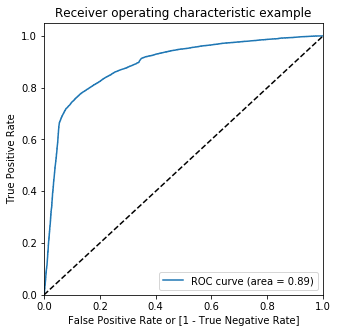

In [291]:
draw_roc(y_L_train_pred_final.Churn, y_L_train_pred_final.Churn_Prob)

In [292]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_L_train_pred_final[i]= y_L_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.023664,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.105096,1,0,1,1,0,0,0,0,0,0,0,0
2,0,0.304104,2,0,1,1,1,1,0,0,0,0,0,0
3,0,0.875281,3,1,1,1,1,1,1,1,1,1,1,0
4,0,0.219575,4,0,1,1,1,0,0,0,0,0,0,0


In [293]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_L_train_pred_final.Churn, y_L_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.658494  0.973200  0.343787
0.2   0.2  0.717537  0.952724  0.482349
0.3   0.3  0.765901  0.927842  0.603960
0.4   0.4  0.803172  0.860194  0.746151
0.5   0.5  0.812866  0.821834  0.803898
0.6   0.6  0.820979  0.787051  0.854906
0.7   0.7  0.821886  0.740397  0.903375
0.8   0.8  0.772303  0.593800  0.950806
0.9   0.9  0.551656  0.113784  0.989529


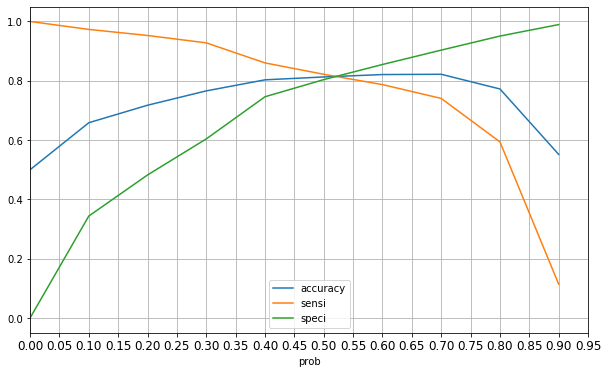

In [294]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.grid()
plt.show()

In [295]:
y_L_train_pred_final['final_predicted'] = y_L_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.52 else 0)
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.023664,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.105096,1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.304104,2,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.875281,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.219575,4,0,1,1,1,0,0,0,0,0,0,0,0


In [296]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_L_train_pred_final.Churn, y_L_train_pred_final.final_predicted)

0.8173241407910424

In [297]:
confusion2 = metrics.confusion_matrix(y_L_train_pred_final.Churn, y_L_train_pred_final.final_predicted )
confusion2

array([[16003,  3288],
       [ 3760, 15531]], dtype=int64)

In [298]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [299]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8050904566896481

In [300]:
# Let us calculate specificity
TN / float(TN+FP)

0.8295578248924369

In [301]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_L_train_pred_final[i]= y_L_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_L_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.023664,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.105096,1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.304104,2,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.875281,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.219575,4,0,1,1,1,0,0,0,0,0,0,0,0


### Fitting Test Model

In [302]:
X_L_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9001 entries, 15721 to 16035
Columns: 162 entries, arpu_6 to vol_3g_mb_diff
dtypes: float64(162)
memory usage: 11.2 MB


In [303]:
float_var = X_L_test.select_dtypes(include='float').columns

In [304]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_L_test[float_var] = scaler.fit_transform(X_L_test[float_var])

X_L_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
15721,1.855677,3.148917,2.579746,1.093671,1.570303,2.642442,-0.760845,-0.782702,-0.646965,-0.297387,0.067166,-0.26963,-0.310632,1.900919,-0.286363,4.171673,4.886906,5.497225,-0.681091,-0.767681,-0.515978,-0.046080,-0.126607,-0.046023,-0.359895,-0.349916,-0.350259,1.372015,1.659340,3.329515,-0.429180,-0.428148,-0.396037,-0.426184,-0.437893,-0.404438,-0.243336,-0.237838,-0.234329,-0.546014,-0.552471,-0.502652,-0.113025,-0.123456,-0.1137,-0.347737,-0.076295,-0.242467,0.515322,-0.041208,-0.045704,0.180180,0.276283,1.155083,1.299235,1.674602,1.797645,-0.797383,-0.796687,-0.627203,-0.377282,-0.449786,-0.477468,-0.113870,0.019858,0.146324,-0.366668,-0.003561,-0.355678,-0.332539,-0.217177,-0.457139,-0.267662,-0.272129,-0.264381,-0.425746,-0.192648,-0.500262,-0.264295,-0.095975,-0.054198,-0.429257,-0.223393,-0.277224,-0.256181,-0.263513,-0.259006,-0.208435,-0.218613,-0.216290,0.772395,1.005504,0.876480,1.672300,3.047911,2.792466,0.679133,0.643445,0.743555,0.050592,0.467654,0.397437,0.177157,1.600569,0.607439,1.836132,1.770532,1.910691,1.744573,3.715692,3.693025,0.012074,-0.033689,0.189958,2.027431,4.010827,3.975980,0.828496,0.816328,0.878302,2.237589,-0.415676,-0.396492,-0.472807,0.364695,-0.469784,1.645168,3.907667,3.871628,-0.299527,1.402702,-0.262903,0.956208,0.945677,1.025518,-0.984014,3.972159,4.029132,4.148876,0.393158,1.818916,0.258811,-0.107508,-0.946668,3.136075,0.125960,0.039106,-0.035169,1.300354,0.345905,-0.223865,0.023909,0.126177,0.211250,-0.030304,0.729244,0.085993,-0.461209,0.089789,0.562161,0.233128,1.424699
4719,0.497212,1.108531,0.726274,-0.227522,-0.150772,-0

In [305]:
X_L_test = X_L_test[col]
X_L_test.head()

,loc_og_t2t_mou_8,std_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_6,fb_user_8,total_ic_mou_diff
15721,5.497225,-0.502652,1.797645,-0.627203,-0.477468,-0.500262,-0.264295,1.025518,0.211250
4719,0.335380,-0.575328,0.196033,1.060432,-0.477468,-0.500262,0.847388,-1.032836,-0.880361
9414,-0.405515,-0.386834,-0.246834,-0.051154,0.976306,-0.480287,0.238035,-1.032836,-0.570862
29717,-0.378486,1.211586,-0.520402,-0.674162,-0.477468,-0.493212,-0.746460,-1.032836,0.056105
7841,-0.305351,0.490272,-0.385341,0.093450,-0.477468,0.647170,-0.904642,-1.032836,1.118501


In [306]:
X_L_test_sm = sm.add_constant(X_L_test)

In [307]:
y_L_test_pred = res.predict(X_L_test_sm)

In [308]:
y_L_test_pred[:10]

15721    0.007956
4719     0.412895
9414     0.472103
29717    0.600743
7841     0.252115
16233    0.114397
28748    0.463613
19997    0.004119
19346    0.059809
2411     0.810063
dtype: float64

In [309]:
# Converting y_pred to a dataframe which is an array
y_L_pred_1 = pd.DataFrame(y_L_test_pred)

In [310]:
# Let's see the head
y_L_pred_1.head()

,0
15721,0.007956
4719,0.412895
9414,0.472103
29717,0.600743
7841,0.252115


In [311]:
# Converting y_test to dataframe
y_L_test_df = pd.DataFrame(y_L_test)

In [312]:
# Putting CustID to index
y_L_test_df['CustID'] = y_L_test_df.index

In [313]:
# Removing index for both dataframes to append them side by side 
y_L_pred_1.reset_index(drop=True, inplace=True)
y_L_test_df.reset_index(drop=True, inplace=True)

In [314]:
# Appending y_test_df and y_pred_1
y_L_test_pred_final = pd.concat([y_L_test_df, y_L_pred_1],axis=1)

In [315]:
y_L_test_pred_final.head()

,churn,CustID,0
0,0,15721,0.007956
1,0,4719,0.412895
2,0,9414,0.472103
3,0,29717,0.600743
4,0,7841,0.252115


In [316]:
# Renaming the column 
y_L_test_pred_final= y_L_test_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [317]:
# Let's see the head of y_pred_final
y_L_test_pred_final.head()

,churn,CustID,Churn_Prob
0,0,15721,0.007956
1,0,4719,0.412895
2,0,9414,0.472103
3,0,29717,0.600743
4,0,7841,0.252115


In [318]:
# Add final predicted column if prob >0.55 then 1 else 0
y_L_test_pred_final['final_predicted'] = y_L_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)

In [319]:
y_L_test_pred_final.head()

,churn,CustID,Churn_Prob,final_predicted
0,0,15721,0.007956,0
1,0,4719,0.412895,0
2,0,9414,0.472103,0
3,0,29717,0.600743,1
4,0,7841,0.252115,0


In [320]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_L_test_pred_final.churn, y_L_test_pred_final.final_predicted)

0.8212420842128653

In [321]:
confusion2 = metrics.confusion_matrix(y_L_test_pred_final.churn, y_L_test_pred_final.final_predicted )
confusion2

array([[6829, 1440],
       [ 169,  563]], dtype=int64)

In [322]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [323]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7691256830601093

In [324]:
# Let us calculate specificity
TN / float(TN+FP)

0.8258556052727053

In [325]:
fpr, tpr, thresholds = metrics.roc_curve(y_L_test_pred_final.churn, y_L_test_pred_final.Churn_Prob, drop_intermediate = False )

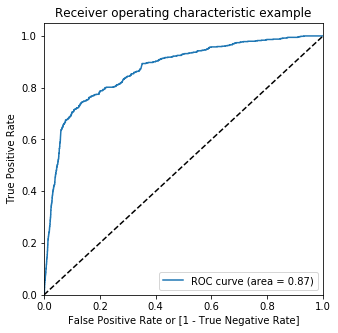

In [326]:
draw_roc(y_L_test_pred_final.churn, y_L_test_pred_final.Churn_Prob)

# High Performance Model

## Dimensionality Reduction Using PCA

In [332]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [333]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [334]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.62
1       21.05
2       26.87
3       31.78
4       35.86
5       39.60
6       42.35
7       44.94
8       47.27
9       49.41
10      51.45
11      53.38
12      55.19
13      56.91
14      58.52
15      59.99
16      61.38
17      62.73
18      64.08
19      65.39
20      66.59
21      67.78
22      68.90
23      69.99
24      71.03
25      72.01
26      72.97
27      73.90
28      74.80
29      75.69
30      76.55
31      77.37
32      78.18
33      78.97
34      79.71
35      80.45
36      81.17
37      81.86
38      82.52
39      83.17
40      83.78
41      84.35
42      84.89
43      85.43
44      85.95
45      86.45
46      86.92
47      87.39
48      87.84
49      88.26
50      88.66
51      89.04
52      89.41
53      89.77
54      90.11
55      90.44
56      90.78
57      91.10
58      91.42
59      91.73
60      92.03
61      92.32
62      92.60
63      92.88
64      93.15
65      93.42
66      93.67
67      93.92
68      94.15
69      94.37
70      94.59
71    

In [335]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [336]:
pca.components_

array([[ 1.32625528e-01,  1.37542239e-01,  1.24843154e-01, ...,
         3.08055708e-02,  2.46422531e-02,  1.42740108e-02],
       [ 3.76330114e-02,  5.15522518e-02,  8.88383347e-02, ...,
         1.88945107e-02,  7.25571987e-03,  1.85211554e-02],
       [ 7.65962702e-03,  1.00468525e-01,  1.97254133e-01, ...,
         8.64828382e-02,  3.53402312e-02,  6.35717342e-02],
       ...,
       [-1.93603981e-01, -1.80095092e-01,  4.48192565e-01, ...,
        -2.46759131e-03, -2.42892816e-04,  4.65791898e-03],
       [-1.88297809e-03,  3.46168982e-03, -2.88962720e-03, ...,
         1.04158389e-03, -3.66591714e-04, -2.97212621e-03],
       [ 1.56971533e-02,  1.30475838e-02, -2.49759436e-02, ...,
        -2.16435290e-03, -1.09971768e-03,  8.67490866e-04]])

In [337]:
pca.explained_variance_ratio_

array([1.16240137e-01, 9.42773553e-02, 5.81356275e-02, 4.91018530e-02,
       4.08434259e-02, 3.74038644e-02, 2.74866398e-02, 2.59602036e-02,
       2.32102884e-02, 2.14321509e-02, 2.04195200e-02, 1.92544585e-02,
       1.81386102e-02, 1.72040826e-02, 1.60925430e-02, 1.47348380e-02,
       1.38245204e-02, 1.35328243e-02, 1.34733046e-02, 1.31434075e-02,
       1.20365574e-02, 1.18071928e-02, 1.12706103e-02, 1.08411888e-02,
       1.04435325e-02, 9.76953059e-03, 9.64788812e-03, 9.30073922e-03,
       8.99621309e-03, 8.88307796e-03, 8.57490828e-03, 8.16953854e-03,
       8.12507439e-03, 7.92712596e-03, 7.41772641e-03, 7.38486078e-03,
       7.22276192e-03, 6.90204321e-03, 6.59840106e-03, 6.47167642e-03,
       6.14122836e-03, 5.61766726e-03, 5.45918856e-03, 5.36548455e-03,
       5.24603722e-03, 4.92666655e-03, 4.77792052e-03, 4.68853986e-03,
       4.44054209e-03, 4.21544724e-03, 4.00128252e-03, 3.83856529e-03,
       3.66923011e-03, 3.57408923e-03, 3.40678829e-03, 3.36977348e-03,
      

95% of the information is contained by 70 Variables by below graph

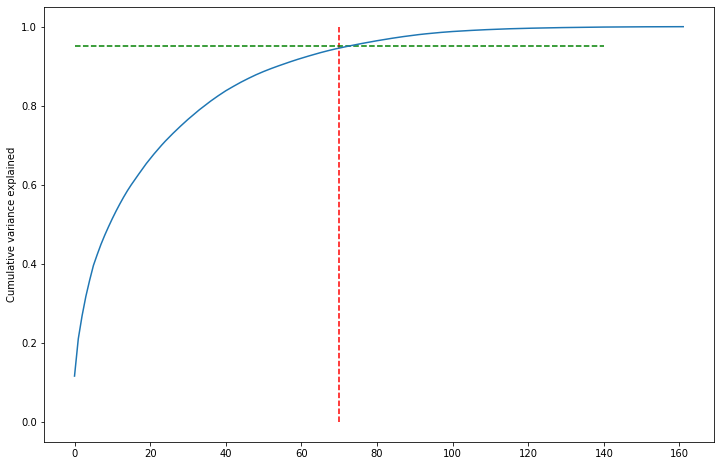

In [338]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [339]:
from sklearn.decomposition import IncrementalPCA

Make Incremental PCA with 70 components

In [340]:
pca_final = IncrementalPCA(n_components=70)

In [341]:
df_train_pca = pca_final.fit_transform(X_train)

In [342]:
df_train_pca.shape

(21000, 70)

In [343]:
df_train_pca

array([[  191.69566703,   879.27766464,  1496.38736862, ...,
           -8.30547121,   -17.32026455,    23.23261844],
       [-1526.44721976,  -638.29007036,  -557.70502073, ...,
            9.5385615 ,    -8.88437216,    24.08333997],
       [-1660.41586217,  -679.50973029,  -736.30014019, ...,
           -8.31230521,   -13.43064676,    32.72014644],
       ...,
       [ -772.75997382,  -662.40278403,  1283.70524044, ...,
          -22.34595449,     1.80294264,    15.74389461],
       [  839.76282098,   652.74646456,  1370.64980762, ...,
          -69.1272927 ,   -35.02966672,    32.69785278],
       [ -323.34083101,   171.80804461,   159.02280243, ...,
           23.37961379,     8.49371243,   -53.31937555]])

Check the correlation among the prinicple components. These should be highly uncorrelated

In [344]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [345]:
corrmat.shape

(70, 70)

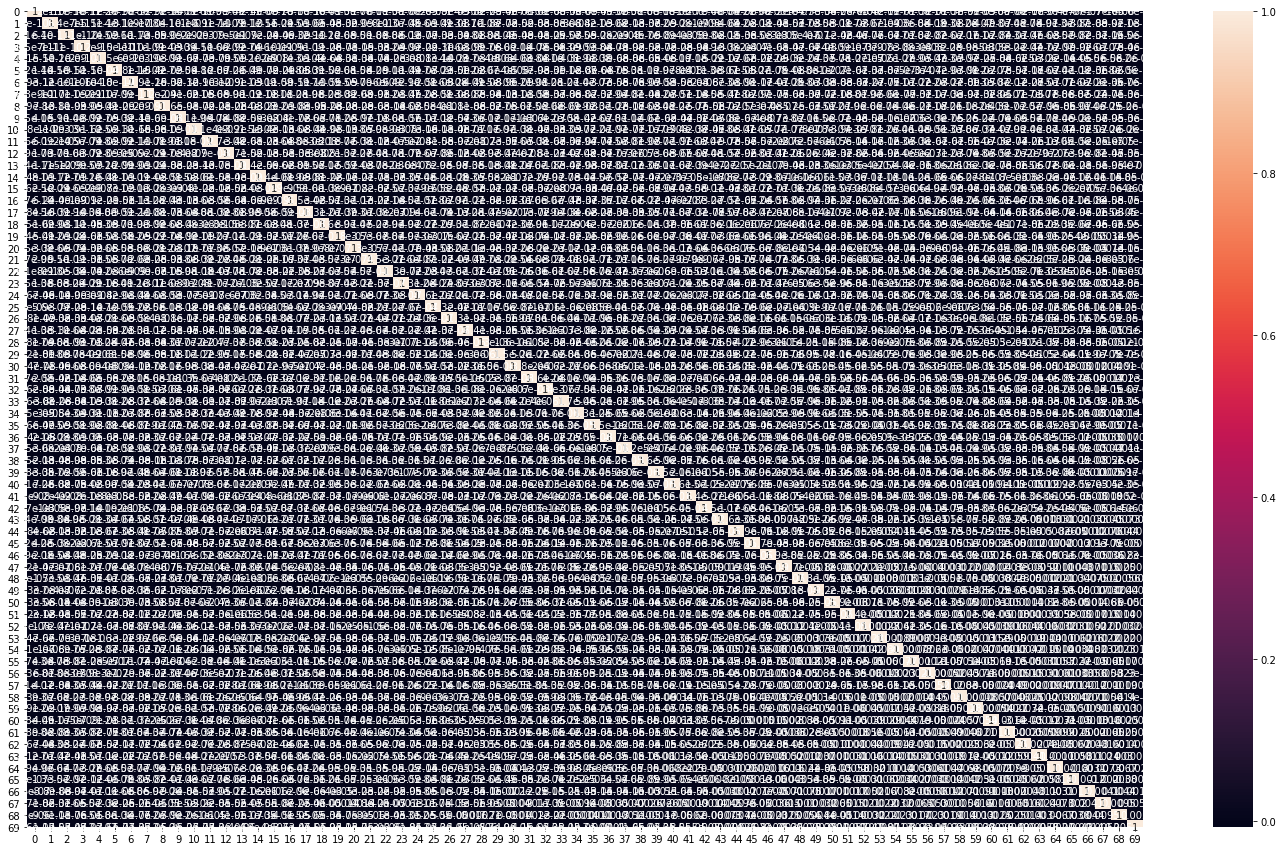

In [347]:
plt.figure(figsize=[25,15])
sns.heatmap(corrmat, annot=True)

In [348]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 70)

In [349]:
lis_columns = []
for i in range(1,71):
    col = "PC" + str(i)
    lis_columns.append(col) # Naming PC1..PC50 and creating dataframe

In [350]:
train_df = pd.DataFrame(df_train_pca, columns=lis_columns)
train_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
0,191.695667,879.277665,1496.387369,-525.918269,-372.209741,97.091326,135.630185,560.106702,622.405379,-689.798785,-41.180211,-240.842142,-333.087411,2.828131,198.052490,-264.874852,109.001890,424.429857,-219.439224,-104.062375,-139.944975,-30.280931,-216.996254,84.571581,-211.670316,155.478481,-69.789626,249.945061,172.402437,154.313179,-16.352709,-235.094255,163.438563,-237.047840,95.250659,-56.957850,-143.831891,54.190424,-111.594616,6.470436,88.885954,120.360340,134.051168,31.756642,-64.343416,-6.536967,-44.734251,25.931105,9.508249,-47.628652,-17.565580,137.537422,-28.024407,-18.794205,-7.374626,10.947334,80.812695,-10.385031,-3.793925,-2.937413,24.967994,4.931650,25.930143,42.254666,17.741907,-11.500077,-8.666433,-8.305471,-17.320265,23.232618
1,-1526.447220,-638.290070,-557.705021,517.411446,-349.301663,73.719424,520.051154,113.364173,-156.796744,56.857347,316.958566,12.966859,-139.892914,58.135846,-113.105880,130.818743,55.170292,-217.935204,-23.264688,138.801790,7.019900,46.348158,-71.896970,8.812534,117.860795,140.651044,-93.870657,89.066795,170.809680,-70.720896,72.549025,97.998139,94.260962,-77.626903,19.046939,18.739449,-20.943056,23.859837,-39.786368,31.481737,-5.704922,-130.998881,20.382888,-29.226972,-0.820356,-1.463470,37.495519,-13.144014,-0.862327,6.174345,3.885933,-51.546522,0.767765,31.041118,-20.175671,-0.901005,-26.939234,-29.550932,7.526596,17.136614,6.764980,3.060046,12.356546,-7.535496,-5.149113,11.184603,-0.604866,9.538561,-8.884372,24.083340
2,-1660.415862,-679.509730,-736.300140,214.994487,-90.198988,-20.344712,97.511817,41.641690,-1.740681,222.605605,52.974610,-44.936237,-435.924097,35.497722,-248.351069,9.680208,-1.897473,1.458918,69.385213,21.138059,-17.189744,-68.299117,28.161773,-35.827579,-10.801034,26.574511,14.761252,-83.378282,61.408071,-60.189452,-1.579549,59.858083,75.130697,-55.422920,20.398768,15.252364,-36.665817,-13.833519,-49.992374,15.119912,7.804934,-31.525174,68.280301,15.541326,15.196515,6.398068,16.422222,-10.723729,6.808007,3.313853,-75.510487,-13.281352,5.398526,-1.620857,21.826870,-14.250098,-74.206514,-51.472295,10.954943,1.680099,-7.851813,1.411035,-7.998744,2.903478,-0.446113,-6.073722,2.049807,-8.312305,-13.430647,32.720146
3,95.597453,-1712.372377,-350.946825,-1527.370160,220.569625,-16.596131,317.813992,-328.757795,26.605213,-110.380303,194.512538,159.705442,-213.483347,221.270818,107.942768,124.044468,-56.071276,250.669406,-187.333227,-118.391089,219.661983,-79.548904,129.121629,-53.967226,-90.175130,30.251317,-45.467521,79.264995,-15.521294,38.604987,-14.515160,-11.915166,31.765687,7.765790,56.940119,36.929934,-42.693574,32.368668,-24.618706,-23.446768,-102.766724,-14.755939,-20.998431,20.736952,-23.997974,-5.744388,-48.519204,-20.887694,24.233004,-6.270420,17.990761,10.081326,66.027171,-1.115381,-37.186651,-25.025521,-20.895474,11.437642,-9.569608,-29.166436,-9.585865,25.800832,-13.331873,-45.232515,39.050322,20.623672,15.510534,21.143775,22.964674,18.228816
4,3859.025296,-431.005622,-1132.415555,563.450231,707.472495,1345.567192,-206.200039,522.076325,-313.162853,-336.359497,-216.215734,-154.198500,-25.663651,-203.026567,-8.158574,-237.263381,492.177299,-82.499909,-50.445451,-128.499578,232.890916,-148.472974,-179.910880,-154.169750,-217.790151,39.880113,-51.792599,63.889255,-36.220339,67.176129,27.703925,67.080192,15.322538,9.606658,-59.190873,-65.779495,-0.224159,-41.082218,1.297268,-65.134410,172.382972,-11.303791,5.160897,63.306843,45.552076,35.204688,-12.564035,-34.872500,80.118735,32.711303,25.076419,26.086677,-24.022026,-20.157933,28.842127,0.158782,-15.365966,21.679239,-25.768778,-5.068354,-2.473760,4.759803,-27.817710,13

In [351]:
test_df = pd.DataFrame(df_test_pca, columns=lis_columns)
test_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
0,91.695740,4265.276637,-2923.402681,-132.439669,-398.242363,1391.530618,688.374344,261.322407,917.613531,634.656356,784.019996,-288.285896,308.101711,-203.705440,486.645561,544.374717,-1268.866601,40.354269,-300.204829,-549.209449,-0.623068,-482.730003,147.426717,-143.011282,-132.695961,373.773557,-65.433608,-124.135643,-70.781959,-63.889690,114.107395,69.595569,-34.377095,-111.577188,-10.113977,-246.824334,-13.539374,-168.625324,-202.744715,-22.754137,-81.797703,74.047311,-20.666017,70.334648,-3.219195,10.942595,56.706300,67.503693,2.387157,78.914712,-111.761759,-84.435337,-1.517869,20.675058,-20.542691,36.274214,-118.816531,41.952681,8.968286,46.590438,-14.786600,20.515545,19.944114,-43.739288,-2.538837,16.198986,37.145236,36.430324,33.971974,71.673288
1,597.587765,523.613875,1140.448432,-354.752665,-1228.170099,274.597697,-95.254646,406.576625,397.174858,200.491171,-60.377571,-59.293369,-230.390296,-51.181428,48.272601,-167.620098,326.059222,215.740619,-185.971401,-17.188367,67.175561,-6.500079,-56.885142,163.271303,137.120808,2.403552,-9.896938,4.524917,30.527923,113.292340,13.104442,-53.163470,-25.930494,30.801011,-25.346299,-95.212034,27.074283,-5.161113,51.549245,-75.366464,21.180773,16.671047,-17.148007,-25.206257,-37.841982,-7.800677,-30.342516,34.521046,-12.457190,16.563013,-34.997324,-57.310284,-3.771948,-24.430341,11.952735,-12.352560,-9.608851,-18.633999,-43.697421,-7.625016,7.111568,2.026466,-1.470333,11.547216,13.536704,-44.649869,-6.185059,-23.002905,25.997925,-8.974073
2,-229.970572,-305.139586,1091.051767,-290.991510,152.448383,-252.698260,57.523684,64.125920,-65.418676,101.180872,-60.068318,30.037406,-204.734707,-148.768500,34.045165,-106.534876,187.302523,15.136939,-61.192957,-32.682973,11.337977,-100.608705,42.602247,34.734530,69.662281,-9.820698,13.991404,-11.010100,17.901661,66.698781,-79.754254,-24.225037,-14.367642,38.849840,10.266627,-1.570272,-20.199824,-22.253203,-42.024409,-43.137043,16.305694,19.604013,7.497005,14.272622,21.498355,14.587327,48.780759,9.698114,10.013062,-7.571038,8.666627,6.217098,17.770200,-23.599790,28.845190,3.645847,21.124790,21.840304,50.345639,-20.718028,-1.490246,-6.314874,-17.077263,3.654706,-7.893904,-0.455937,-1.611078,2.063642,-9.260479,2.670305
3,1414.264539,-1080.867221,-603.672665,310.099519,1027.847013,950.066512,-7.396689,-74.272345,-78.777796,85.523027,2.062597,-47.974582,-133.166468,-95.176754,60.954579,55.129067,209.419424,86.109168,-40.378335,31.539793,120.331620,27.650772,-136.257132,-42.292076,10.437477,6.175087,-8.788055,42.614608,-60.032803,-0.149605,8.062442,-31.205018,20.572354,55.351070,-38.403996,-37.504553,24.671078,9.741390,61.670668,2.799724,11.140761,-4.186796,16.511738,48.725825,8.551901,35.621708,-46.388932,-13.786048,29.902207,-11.457463,-2.740771,-19.238547,-22.036932,8.016473,5.945622,13.105858,-22.290851,7.626797,-8.676500,11.066702,-23.595194,-18.443160,8.009293,-5.829044,3.888930,5.195433,-4.384082,1.202927,5.662418,-6.499622
4,-9.249532,-1033.408598,-536.268980,648.559850,-521.482504,-576.380358,-239.796774,481.259682,150.131508,-54.917130,100.070902,-464.553540,-354.269425,709.950454,237.262205,319.395993,-183.194305,815.396989,-173.052420,152.663113,-330.168651,340.002872,-351.282203,-279.605891,595.838174,-97.697708,29.018132,-10.947879,33.714867,-9.513206,113.587661,-46.485618,26.671890,166.744031,-45.770116,-46.723260,60.053743,-37.610113,41.725827,7.868035,-35.273916,137.249851,73.744364,173.698424,-162.169962,-31.512779,237.653179,-148.653443,44.806763,5.458108,9.564320,-94.576113,-49.155369,15.904595,7.627309,54.140772,24.972111,-25.133492,53.901845,36.239237,52.925161,1.999415,15.630538,9.613882,

# Model Building with PCA

## Model-1 PCA and Logistic Regression

In [352]:
# create pipeline
PCA_VARS = 70
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [353]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.818047619047619

#### Evalute On Test data

In [359]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Let's check the overall accuracy.
print("Accuracy: \t", round(metrics.accuracy_score(y_test, y_pred),2))

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6703 1566]
 [ 115  617]]
Sensitivity: 	0.84
Specificity: 	0.81
Accuracy: 	 0.81
AUC:    	 0.9


### Hyperparameter tuning - PCA and Logistic Regression

In [360]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918619
1    0.081381
Name: churn, dtype: float64

In [495]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [362]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   32.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [363]:
# cross validation results
pd.DataFrame(model.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.101689,0.010683,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,1.304240,0.027657,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
2,1.363060,0.021084,0.037010,0.005453,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.900538,0.888812,0.874746,0.875369,0.879005,0.883694,0.009811,14
3,1.741582,0.024297,0.040762,0.006325,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.904555,0.892315,0.880544,0.874276,0.883714,0.887081,0.010495,1
4,1.119315,0.040082,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28


In [364]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8870808920839229
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [365]:
# predict churn on test data
y_pred = model.predict(X_train)

# create onfusion matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Let's check the overall accuracy.
print("Accuracy: \t", round(metrics.accuracy_score(y_train, y_pred),2))

# check area under curve
y_pred_prob = model.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

[[16398  2893]
 [  330  1379]]
Sensitivity: 	0.81
Specificity: 	0.85
Accuracy: 	 0.85
AUC:    	 0.9


In [367]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Let's check the overall accuracy.
print("Accuracy: \t", round(metrics.accuracy_score(y_test, y_pred),2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6969 1300]
 [ 133  599]]
Sensitivity: 	0.82
Specificity: 	0.84
Accuracy: 	 0.84
AUC:    	 0.9


# Model 2 -  Decision Trees (Without PCA and with PCA)

### Model 2(a) Decision Tree without PCA

In [368]:
from sklearn.tree import DecisionTreeClassifier

In [369]:
X_DT_train=X_train.copy()
X_DT_test=X_test.copy()
y_DT_train=y_train.copy()
y_DT_test=y_test.copy()

In [370]:
print("X_DT_train Shape : ", X_DT_train.shape)
y_DT_train_imb = (y_DT_train != 0).sum()/(y_DT_train == 0).sum()
print("Imbalance in Train Data : ", y_DT_train_imb)

X_DT_train Shape :  (21000, 162)
Imbalance in Train Data :  0.08859053444611477


In [371]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_DT_train,y_DT_train = sm.fit_sample(X_DT_train,y_DT_train)

In [372]:
print("X_DT_train Shape : ", X_DT_train.shape)
y_DT_train_imb = (y_DT_train != 0).sum()/(y_DT_train == 0).sum()
print("Imbalance in Train Data : ", y_DT_train_imb)

X_DT_train Shape :  (38582, 162)
Imbalance in Train Data :  1.0


In [373]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=10)

In [374]:
dt.fit(X_DT_train, y_DT_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

In [375]:
y_DT_train_pred = dt.predict(X_DT_train)
y_DT_test_pred = dt.predict(X_DT_test)

In [376]:
from sklearn.metrics import classification_report

In [377]:
print(classification_report(y_DT_train, y_DT_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     19291
           1       0.87      0.88      0.88     19291

    accuracy                           0.87     38582
   macro avg       0.87      0.87      0.87     38582
weighted avg       0.87      0.87      0.87     38582



In [378]:
print(classification_report(y_DT_test, y_DT_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8269
           1       0.34      0.80      0.47       732

    accuracy                           0.86      9001
   macro avg       0.66      0.83      0.70      9001
weighted avg       0.93      0.86      0.88      9001



In [380]:
from sklearn.metrics import plot_roc_curve

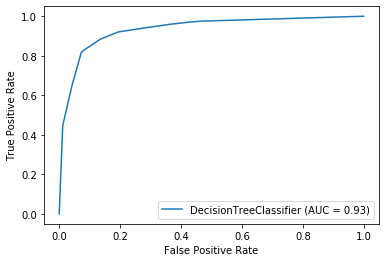

In [381]:
plot_roc_curve(dt, X_DT_train, y_DT_train, drop_intermediate=False)
plt.show()

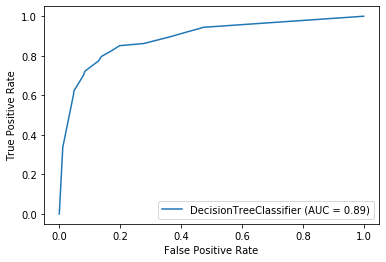

In [382]:
plot_roc_curve(dt, X_DT_test, y_DT_test, drop_intermediate=False)
plt.show()

#### Decision Tree with Hyperparameter Tuning

In [504]:
from sklearn.model_selection import GridSearchCV

In [505]:
dt = DecisionTreeClassifier(random_state=42)

In [506]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
    'criterion': ["gini", "entropy"]
}

In [507]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [508]:
%%time
grid_search.fit(X_DT_train, y_DT_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.7min finished


Wall time: 1min 48s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [388]:
grid_search.best_score_

0.9188229364070791

In [389]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

By below ROC_Curve its clear that Model is overfit

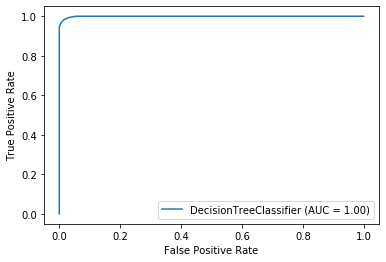

In [390]:
plot_roc_curve(dt_best, X_DT_train, y_DT_train)
plt.show()

In [391]:
%%time
dt_best.fit(X_DT_test, y_DT_test)

Wall time: 705 ms


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [392]:
y_DT_train_pred = dt_best.predict(X_DT_train)
y_DT_test_pred = dt_best.predict(X_DT_test)

In [393]:
print(classification_report(y_DT_train, y_DT_train_pred))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75     19291
           1       0.91      0.42      0.57     19291

    accuracy                           0.69     38582
   macro avg       0.76      0.69      0.66     38582
weighted avg       0.76      0.69      0.66     38582



In [394]:
print(classification_report(y_DT_test, y_DT_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8269
           1       0.90      0.86      0.88       732

    accuracy                           0.98      9001
   macro avg       0.94      0.92      0.93      9001
weighted avg       0.98      0.98      0.98      9001



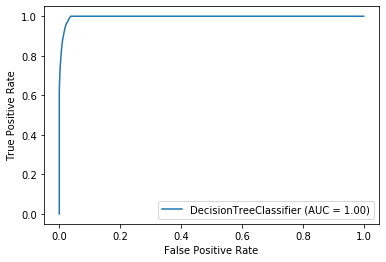

In [395]:
plot_roc_curve(dt_best, X_DT_test, y_DT_test)
plt.show()

Will not utilize this model as PCA was not used in this and as per ROC it looks overfit.

Lets try to make another Decicion Tree Model with PCA this time

## Model 2(b) Decision Tree with PCA

In [462]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_Pca = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt_Pca.fit(train_df,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [463]:
# predict churn on test data
y_pred_dt = dt_Pca.predict(test_df)

In [464]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_rf=metrics.confusion_matrix(y_test, y_pred_dt)
confusion_rf

array([[6337, 1932],
       [ 176,  556]], dtype=int64)

In [465]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] #false negatives

In [466]:
# Let us calculate specificity
TN / float(TN+FP)

0.7663562704075463

In [467]:
# Printing accuracy and recall
print("Accuracy",metrics.accuracy_score(y_test, y_pred_dt))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred_dt))

Accuracy 0.7658037995778247
sensitivity/recall 0.7595628415300546


#### Hyperparameter tuning

In [468]:
#Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# # Fit the grid search to the data
grid_search.fit(train_df,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [469]:
# cv results
scores_dt_pca = pd.DataFrame(grid_search.cv_results_)
scores_dt_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.808044,0.033978,0.003124,0.006249,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.739762,0.783571,0.796190,0.815000,0.788095,0.784524,0.024828,13
1,0.789079,0.002479,0.000000,0.000000,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.739762,0.783571,0.796190,0.815000,0.788095,0.784524,0.024828,13
2,0.781979,0.021057,0.000000,0.000000,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.748095,0.778810,0.821429,0.802857,0.773571,0.784952,0.025206,9
3,0.765720,0.008376,0.003134,0.006267,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.748095,0.778810,0.821429,0.802857,0.773571,0.784952,0.025206,9
4,1.269969,0.046710,0.006517,0.007994,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.789048,0.806905,0.799524,0.800238,0.820476,0.803238,0.010342,3


In [470]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.804
DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=50, min_samples_split=100)


In [471]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(train_df,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Classification_report - Train Data 

In [482]:
# Making predictions
X_train_dc_pca = pd.DataFrame(data=train_df)
y_pred_dc_pca = clf_gini.predict(X_train_dc_pca)

# Printing classification report
print(classification_report(y_train, y_pred_dc_pca))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     19291
           1       0.25      0.82      0.38      1709

    accuracy                           0.78     21000
   macro avg       0.61      0.80      0.62     21000
weighted avg       0.92      0.78      0.83     21000



Classification_report - Test Data 

In [473]:
# Making predictions
X_test_dc_pca = pd.DataFrame(data=test_df)
y_pred_dc_pca = clf_gini.predict(X_test_dc_pca)

# Printing classification report
print(classification_report(y_test, y_pred_dc_pca))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      8269
           1       0.23      0.76      0.35       732

    accuracy                           0.77      9001
   macro avg       0.60      0.76      0.60      9001
weighted avg       0.91      0.77      0.82      9001



Confusion_matrix - Train Data

In [484]:
# Printing confusion_matrix
cm_trn=confusion_matrix(y_train, y_pred_dc_pca)
cm_trn

[[15029  4262]
 [  302  1407]]


In [485]:
TN = cm_trn[0,0] # true positive 
TP = cm_trn[1,1] # true negatives
FP = cm_trn[0,1] # false positives
FN = cm_trn[1,0] #false negatives

In [486]:
# Let us calculate specificity
TN / float(TN+FP)

0.7790679591519362

In [487]:
# Printing accuracy and recall
print("accuracy",metrics.accuracy_score(y_train, y_pred_dc_pca))
print("sensitivity/recall", metrics.recall_score(y_train, y_pred_dc_pca))

accuracy 0.7826666666666666
sensitivity/recall 0.823288472791106


Confusion_matrix - Test Data

In [477]:
cm =confusion_matrix(y_test, y_pred_dc_pca)
cm

array([[6359, 1910],
       [ 176,  556]], dtype=int64)

In [459]:
# Printing accuracy and recall
print("Accuracy",metrics.accuracy_score(y_test, y_pred_dc_pca))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred_dc_pca))

Accuracy 0.7682479724475059
sensitivity/recall 0.7595628415300546


In [460]:
TN = cm[0,0] # true positive 
TP = cm[1,1] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] #false negatives

In [461]:
# Let us calculate specificity
TN / float(TN+FP)

0.7690168097714355

## Model 3 -  AdaBoost with PCA 

Class Balancing Using SMOTE

In [488]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
train_df,y_train = sm.fit_sample(train_df,y_train)
print(train_df.shape)
print(y_train.shape)
np.count_nonzero(train_df)

(38582, 70)
(38582,)


2700740

In [489]:
test_df,y_test = sm.fit_sample(test_df,y_test)
print(test_df.shape)
print(y_test.shape)
np.count_nonzero(test_df)

(16538, 70)
(16538,)


1157660

In [490]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2) # Creating a stump of depth 2

Define Parameters

In [491]:
param_grid = {
              "n_estimators": [100,400,500,600]
             }

In [492]:
ABC = AdaBoostClassifier(
    base_estimator=tree,
    algorithm="SAMME")

Fit Train

In [376]:
folds = 2
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)
grid_search_ABC.fit(train_df,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 40.2min finished


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(max_depth=2)),
             param_grid={'n_estimators': [100, 400, 500, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [377]:
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,63.893130,0.440228,1.041878,0.004514,100,{'n_estimators': 100},0.922826,0.924433,0.923629,0.000804,4,0.941954,0.934616,0.938285,0.003669
1,308.310710,11.214488,5.109402,0.323655,400,{'n_estimators': 400},0.934491,0.934767,0.934629,0.000138,3,0.960430,0.948678,0.954554,0.005876
2,399.144781,5.649354,6.084958,0.803211,500,{'n_estimators': 500},0.936593,0.937567,0.937080,0.000487,2,0.962979,0.953343,0.958161,0.004818
3,396.912923,6.049771,6.169699,0.196378,600,{'n_estimators': 600},0.937468,0.937999,0.937733,0.000265,1,0.964561,0.954450,0.959506,0.005056


In [378]:
param_grid = {
              #"n_estimators": [100,400,500,600],
              "learning_rate" : [0.2,0.5,0.8]
             }

In [379]:
folds = 2
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)
grid_search_ABC.fit(train_df,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.2min finished


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(max_depth=2)),
             param_grid={'learning_rate': [0.2, 0.5, 0.8]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [380]:
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,31.091387,0.086499,0.573796,0.009051,0.2,{'learning_rate': 0.2},0.892947,0.891809,0.892378,0.000569,3,0.900895,0.896794,0.898844,0.002051
1,31.345185,0.251348,0.525178,0.001500,0.5,{'learning_rate': 0.5},0.909509,0.908948,0.909228,0.000281,2,0.921519,0.915710,0.918614,0.002904
2,31.110331,0.053465,0.524677,0.001996,0.8,{'learning_rate': 0.8},0.909513,0.911650,0.910581,0.001069,1,0.924780,0.919454,0.922117,0.002663


In [381]:
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.2,
    n_estimators=600,
    algorithm="SAMME")

ABC.fit(train_df, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=600)

In [382]:
predictions = ABC.predict_proba(train_df)
predictions[:10]

array([[0.55797652, 0.44202348],
       [0.54190292, 0.45809708],
       [0.54071052, 0.45928948],
       [0.4553719 , 0.5446281 ],
       [0.52717073, 0.47282927],
       [0.57370886, 0.42629114],
       [0.56685509, 0.43314491],
       [0.53295553, 0.46704447],
       [0.54980222, 0.45019778],
       [0.55332516, 0.44667484]])

roc_auc_score - Train Data

In [383]:
metrics.roc_auc_score(y_train, predictions[:, 1])

0.9350731124549511

Accuracy - Train Data

In [384]:
prediction_values = ABC.predict(train_df)
metrics.accuracy_score(y_train, prediction_values)

0.8602716292571666

In [385]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, prediction_values)

array([[16764,  2527],
       [ 2864, 16427]], dtype=int64)

In [386]:
Confusion_matrix = confusion_matrix(y_train, prediction_values)
TP = Confusion_matrix[1,1] # true positive 
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives

In [387]:
print(Confusion_matrix)

[[16764  2527]
 [ 2864 16427]]


In [388]:
# Let us calculate specificity
TN / float(TN+FP)

0.8690062723549842

In [389]:
TP / float(TP+FN)

0.8515369861593489

In [390]:
predictions = ABC.predict_proba(test_df)
predictions[:10]

array([[0.58821647, 0.41178353],
       [0.52395156, 0.47604844],
       [0.52085737, 0.47914263],
       [0.54003541, 0.45996459],
       [0.4946385 , 0.5053615 ],
       [0.55113935, 0.44886065],
       [0.55384601, 0.44615399],
       [0.56115887, 0.43884113],
       [0.53359562, 0.46640438],
       [0.41826371, 0.58173629]])

roc_auc_score - Test Data

In [391]:
metrics.roc_auc_score(y_test, predictions[:, 1])

0.9176554452788149

Accuracy - Test data

In [392]:
prediction_values = ABC.predict(test_df)
metrics.accuracy_score(y_test, prediction_values)

0.8409118394001693

In [393]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction_values)

array([[7130, 1139],
       [1492, 6777]], dtype=int64)

In [394]:
Confusion_matrix = confusion_matrix(y_test, prediction_values)
TP = Confusion_matrix[1,1] # true positive 
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives

In [395]:
print(Confusion_matrix)

[[7130 1139]
 [1492 6777]]


In [396]:
# Let us calculate specificity
TN / float(TN+FP)

0.8622566211150079

In [397]:
TP / float(TP+FN)

0.8195670576853308

# Summary

## Scores of Various Models

>**LogisticRegression - Without PCA**

    - On Train Set:
        - Accuracy Score : 82%
        - Sensitivity: 80%
        - Specificity : 83%
        - AUC : 89%
        
    - On Test Dataset:
        - Accuracy Score : 82%
        - Sensitivity: 77%
        - Specificity : 83%
        - AUC : 87%
        
>**LogisticRegression - With PCA**

    - On Train Set:
        - Accuracy Score : 85%
        - Sensitivity: 81%
        - Specificity : 85%
        - AUC : 90%
        
    - On Test Dataset:
        - Accuracy Score : 84%
        - Sensitivity: 82%
        - Specificity : 84%
        - AUC : 90%


>**DecisionTree - With PCA and Hyperparameter Tuning**

    - On Train Set:
        - Accuracy Score : 78%
        - Sensitivity: 82%
        - Specificity : 78%
        
    - On Test Dataset:
        - Accuracy Score : 77%
        - Sensitivity: 76%
        - Specificity : 77%
        

>**ADABoosting - With PCA and Hyperparameter Tuning**

    - On Train Set:
        - AUC : 94%
        - Accuracy Score : 86%
        - Sensitivity: 85%
        - Specificity : 87%
        
    - On Test Dataset:
        - AUC : 92%    
        - Accuracy Score : 84%
        - Sensitivity: 83%
        - Specificity : 86%     

## Which Model to Use?

Business Objective to retain as many customers as possible hence the model with High Sensivity/Recall should be chose.

From all above models highest sensivity/Recall is given by Ada boost and hence this model should be given preference

## Important churn indicators 

## Business Insights

Important Features for Customer Churn

* total_ic_mou_6	
* total_ic_mou_diff	
* loc_ic_t2m_mou_8	
* loc_ic_t2t_mou_8	
* std_ic_mou_8	
* loc_og_t2t_mou_8	
* loc_ic_t2f_mou_8	
* fb_user_8	
* std_og_mou_8	

From above models its seen that Customer Churns -



* If the Incoming call difference is High in Good Month and Action Month
* If the Local Incoming Calls reduces for same operator
* If the Local Incoming Calls reduces for other operator
* If the Local Incoming Calls reduces for fixed lines
* If the STD Incoming Calls reduces 
* If the STD Outgoing Calls reduces 
* If the Local Incoming Calls are quite less in good month only
* Usage of FB or other such sites reduces






### Recommendations

* STD incoming rates (roaming) and outgoing rates should be decreased.
* T2T (same operator calls) should be cheaper.
* There maybe some severe network issues as the incoming calls getting less drastically. Customer should be approached to take a feedback on this.
* Internet speed can be an issue as FB usage looks dropping.Customer should be approached to take a feedback on this.